<h1 style='background:#00BFFF; color:Black'><Center><br> <u>Lead Scoring Case Study </Center></h1>

### Table of Content <a id="0"></a>

01. [Introduction](#1)
02. [Problem Statement](#2)
03. [Data Cleaning and Pre-processing](#3)
04. [Feature Engineering](#4)
05. [Outlier Analysis of Numeric Variables](#5)
06. [Handling Outliers in Numeric Variables](#6)
07. [Analysis of Categorical Variables](#7)
08. [Creating Dummy Variables of all Categorical Columns](#8)
09. [Creating Correlation Matrix](#9)
10. [Feature Scaling](#10)
11. [Model Building using Logistic Regression](#11)
12. [Evaluating the Results](#12)
13. [Required Final Output as per Problem Statement](#13)
14. [Conclusion & Recommendations](#14)

***

<a id="1"></a> <h1 style='background:#e3e3e1; color:Black'><Left><br>[01. <u>Introduction](#0)<br></Left></h1>

_An education company named **X Education** sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses._<br>

***

<a id="2"></a> <h1 style='background:#e3e3e1; color:Black'><Left><br>[02. <u>Problem Statement](#0)<br></Left></h1>

_X Education gets a lot of leads, but its **lead conversion rate is very poor, typically lead conversion rate is around 30%.** <br> 
For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as **‘Hot Leads’**._<br>
<br>
**Goals of the Case Study**<br>
> **_Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted._**


### **2.1** : Disabling Python Warnings

In [9]:
#Ignore Warnings
import warnings as war
war.filterwarnings('ignore')

### **2.2** : Importing Libraries

In [11]:
# Importing all important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2.3** : Importing required Dataset for EDA

In [13]:
# Loading the required dataset into `Leads` Dataframe and checking its top 5 rows

Leads = pd.read_csv('Dataset\Leads.csv')
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### **2.4** : Checking various stats of our Dataset

In [15]:
# Checking Shape of our Dataset
Leads.shape

(9240, 37)

>**Insight,**
>- __We can see, there are around 9240 Rows and 37 Columns in our Dataset.__

In [17]:
# Checking information about the Dataset and its Datatype.
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

>**Insight,**
>- As per the data dictionary, We can Drop **`Prospect ID`**, as it's an unique ID with which the customer is identified.
>- Similarly , **`Lead Number`** is a unique lead number assigned to each generated lead.


### **2.5** : Checking Descriptive Statistical Summary of our Dataset

In [20]:
# Checking Descriptive statistical summary of all the variables in our dataset
Leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


>**Insight,**<br>
>- __From the Descriptive Summary of all the variables we can see that:__
>- There are few Categorical Columns, that contains only one type of value in the entire dataset, thus we can drop them as they are not contributing in our analysis.
>- Also, there are few Categorical Columns, that contains only Binary Data. Thus we can encode them with 0 and 1, integers for Model building.

***

<a id="3"></a> <h1 style='background:#e3e3e1; color:Black'><Left><br>  [03. <u>Data Cleaning and Pre-processing](#0) </br></Left></h1>

In [23]:
# Creating Copy of our Original Dataset 
Lead_df  = Leads.copy(deep=True) 

### **3.1** : Removing Case Mis-match

In [25]:
# Creating New Function to convert alphabetic characters to uppercase
def to_uppercase_alpha(val):
    if isinstance(val, str):
        return ''.join([char.upper() if char.isalpha() else char for char in val])
    return val

In [26]:
# Removing case mis-match by Standardizing all the values of string type to Uppercase() using the defined Function
Lead_df = Lead_df.map(lambda x: to_uppercase_alpha(x) if isinstance(x, str) else x)


### **3.2** : Checking variables having only 1 type of value in the dataset and Droping them

In [28]:
# Checking variables having only 1 type of value in the dataset and storing them in a list. 
uni_var = []
for col in Lead_df.columns:
    if Lead_df[col].nunique() == 1 :
        print(f' {Lead_df[col].dtype} variable with only {Lead_df[col].nunique()} value is : {col}' )
        uni_var.append(col)
    else: pass 
print(f'\n', uni_var)

 object variable with only 1 value is : Magazine
 object variable with only 1 value is : Receive More Updates About Our Courses
 object variable with only 1 value is : Update me on Supply Chain Content
 object variable with only 1 value is : Get updates on DM Content
 object variable with only 1 value is : I agree to pay the amount through cheque

 ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [29]:
# Droping all the columns, that having only 1 type of value in Dataset
Lead_df.drop(uni_var, axis=1, inplace=True)

# Checking Shape of the dataset
Lead_df.shape

(9240, 32)

### **3.3** : Checking categorical variables having Binary values in the dataset and storing them in a list.

In [31]:
# Checking all the Cartegorical Cloumns having Binary Values in our dataset and having Object Datatype

bi_var = []
for col in Lead_df.columns:
    if Lead_df[col].nunique() == 2 and Lead_df[col].dtype == 'O' :
        print(f' {Lead_df[col].dtype} variable with binary ({Lead_df[col].nunique()}) values is : {col}' )
        bi_var.append(col)
    else: pass 
print(f'\n', bi_var)

 object variable with binary (2) values is : Do Not Email
 object variable with binary (2) values is : Do Not Call
 object variable with binary (2) values is : Search
 object variable with binary (2) values is : Newspaper Article
 object variable with binary (2) values is : X Education Forums
 object variable with binary (2) values is : Newspaper
 object variable with binary (2) values is : Digital Advertisement
 object variable with binary (2) values is : Through Recommendations
 object variable with binary (2) values is : A free copy of Mastering The Interview

 ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


> **Insight,**
>- As we can see there are 9 Categorical Variables having binary values.
>- Now, Let's keep them as it is for easy Exploratory Data Analysis. And then later we can Encode them into 0 and 1 integers for Model building.

### **3.4** : Replacing 'Select' with 'Null value'

In [34]:
# Replacing 'SELECT' value in the dataset with `Null value` as per data dictionary
Lead_df = Lead_df.map(lambda x: None if x=='SELECT' else x)

### **3.5** : Checking for Duplicates Rows Entires & Droping them

In [36]:
# Checking for Duplicate Entires in our Dataset
Lead_df.duplicated().sum()

0

### **3.6** Checking Missing Values in the Dataset

In [38]:
# Checking null values and its percentage in our Dataset

Missing_df = pd.DataFrame({'Null_Count' : Lead_df.isnull().sum().sort_values(ascending = False) ,
                           'Null_Percent': (Lead_df.isnull().sum()/len(Lead_df)*100).sort_values(ascending = False) })
Missing_df

,Null_Count,Null_Percent
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879


>**Insight,**
>- As there are many **`Null values`** in our dataset, by Imputing them we can skew the results and accuracy of the Machine Learning Model. 
>- Thus, we can drop all the columns having more than **`30% Null values`.**

### **3.7** : Dropping Columns with more than 30% missing values

In [41]:
# Checking all the column names with more than 30% missing vaules
Missing_df.loc[Missing_df['Null_Percent']>30 , : ].index

Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'City',
       'Specialization', 'Tags'],
      dtype='object')

In [42]:
# Dropping Null values with more than 30% missing data

Lead_df.drop( ['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
               'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
               'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'City',
               'Tags'] , axis=1 , inplace=True)

Lead_df.shape

(9240, 23)

### **3.8** : Droping **`Prospect ID`** and **`Lead Number`** as per data dictionary

In [44]:
# Droping `Prospect ID` and `Lead Number` columns
Lead_df.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
Lead_df.shape

(9240, 21)

***

<a id="4"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [04. <u>Feature Engineering & Handling Missing Values](#0) </br></Left></h1>

In [46]:
# Checking null values greater than 0 and its percentage in our Dataset
Missing_df = pd.DataFrame({'Null_Count' : Lead_df.isnull().sum().sort_values(ascending = False) ,
                           'Null_Percent': (Lead_df.isnull().sum()/len(Lead_df)*100).sort_values(ascending = False) })

Missing_df.loc[Missing_df['Null_Count']>0 , : ]

,Null_Count,Null_Percent
Specialization,3380,36.580087
What matters most to you in choosing a course,2709,29.318182
What is your current occupation,2690,29.112554
Country,2461,26.634199
TotalVisits,137,1.482684
Page Views Per Visit,137,1.482684
Last Activity,103,1.114719
Lead Source,36,0.389610


### **4.1** : Analysis of **`Specialization`** column
- First let's check the total count of missing values and their percentage in **`Specialization`**

In [48]:
# Checking Percentage of Missing Values in 'Specialization' Columns 
Lead_df['Specialization'].isnull().sum()

3380

In [49]:
# Cheking Value Counts of Speciakuzation Columns
Lead_df['Specialization'].value_counts()

Specialization
FINANCE MANAGEMENT                   976
HUMAN RESOURCE MANAGEMENT            848
MARKETING MANAGEMENT                 838
OPERATIONS MANAGEMENT                503
BUSINESS ADMINISTRATION              403
IT PROJECTS MANAGEMENT               366
SUPPLY CHAIN MANAGEMENT              349
BANKING, INVESTMENT AND INSURANCE    338
TRAVEL AND TOURISM                   203
MEDIA AND ADVERTISING                203
INTERNATIONAL BUSINESS               178
HEALTHCARE MANAGEMENT                159
HOSPITALITY MANAGEMENT               114
E-COMMERCE                           112
RETAIL MANAGEMENT                    100
RURAL AND AGRIBUSINESS                73
E-BUSINESS                            57
SERVICES EXCELLENCE                   40
Name: count, dtype: int64

In [50]:
# Feature Engineering  New Categories to map Original specializations
specialization_mapping = {
    'FINANCE MANAGEMENT': 'Management',
    'HUMAN RESOURCE MANAGEMENT': 'Management',
    'MARKETING MANAGEMENT': 'Management',
    'OPERATIONS MANAGEMENT': 'Management',
    'BUSINESS ADMINISTRATION': 'Management',
    
    'IT PROJECTS MANAGEMENT': 'IT & E-Business',
    'E-COMMERCE': 'IT & E-Business',
    'E-BUSINESS': 'IT & E-Business',
    'INTERNATIONAL BUSINESS': 'IT & E-Business',
    
    'SUPPLY CHAIN MANAGEMENT': 'Supply Chain & Operations',
    'SERVICES EXCELLENCE': 'Supply Chain & Operations',
    'RETAIL MANAGEMENT': 'Supply Chain & Operations',
    'RURAL AND AGRIBUSINESS': 'Supply Chain & Operations',
    
    'BANKING, INVESTMENT AND INSURANCE': 'Finance & Banking',
    
    'MEDIA AND ADVERTISING': 'Media & Advertising',
    
    'HEALTHCARE MANAGEMENT': 'Healthcare',
    
    'TRAVEL AND TOURISM': 'Tourism & Hospitality',
    'HOSPITALITY MANAGEMENT': 'Tourism & Hospitality'
}


In [51]:
# Apply the mapping to the 'Specialization' column
Lead_df['Grouped_Specialization'] = Lead_df['Specialization'].map(specialization_mapping)

In [52]:
# To Handle null values let's replace `NaN` with 'Other' as a Category)
Lead_df['Grouped_Specialization'].fillna('Other', inplace=True)

In [53]:
# Droping 'Specialization' Columns as its not required anymore
Lead_df.drop(['Specialization'], axis=1, inplace=True)

In [54]:
# Checking Value Count of Grouped_Specialization
Lead_df['Grouped_Specialization'].value_counts()

Grouped_Specialization
Management                   3568
Other                        3380
IT & E-Business               713
Supply Chain & Operations     562
Finance & Banking             338
Tourism & Hospitality         317
Media & Advertising           203
Healthcare                    159
Name: count, dtype: int64

### **4.2** : Analysis of **`What matters most to you in choosing a course`** column

In [56]:
# Checking Value count of 'What matters most to you in choosing a course'
Lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
BETTER CAREER PROSPECTS      6528
FLEXIBILITY & CONVENIENCE       2
OTHER                           1
Name: count, dtype: int64

In [57]:
# Checking Null values in 'What matters most to you in choosing a course'
Lead_df['What matters most to you in choosing a course'].isna().sum()

2709

In [58]:
# Relpacing Null values with 'other' as Categories
Lead_df['What matters most to you in choosing a course'].fillna('OTHER', inplace=True)

In [59]:
# As Their are only 2 entries as `FLEXIBILITY & CONVENIENCE`, lets replace them as `Other` to avoid data inconsistency
Lead_df.loc[Lead_df['What matters most to you in choosing a course'] == 'FLEXIBILITY & CONVENIENCE' , 'What matters most to you in choosing a course' ] = 'OTHER'

# Again checking Value count for Changes
Lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
BETTER CAREER PROSPECTS    6528
OTHER                      2712
Name: count, dtype: int64

### **4.3** : Analysis of **`What is your current occupation`** column

In [61]:
# Checking Value count of `What is your current occupation`
Lead_df['What is your current occupation'].value_counts()

What is your current occupation
UNEMPLOYED              5600
WORKING PROFESSIONAL     706
STUDENT                  210
OTHER                     16
HOUSEWIFE                 10
BUSINESSMAN                8
Name: count, dtype: int64

In [62]:
# Checking Null values in `What is your current occupation`
Lead_df['What is your current occupation'].isna().sum()

2690

In [63]:
# Replacing null Values with 'OTHER' as category
Lead_df['What is your current occupation'].fillna('OTHER', inplace=True)

# Again checking Value count for Changes
Lead_df['What is your current occupation'].value_counts()

What is your current occupation
UNEMPLOYED              5600
OTHER                   2706
WORKING PROFESSIONAL     706
STUDENT                  210
HOUSEWIFE                 10
BUSINESSMAN                8
Name: count, dtype: int64

### **4.4** : Analysis of **`Country`** column

In [65]:
# Checking Value Count of `Country` Column
Lead_df['Country'].value_counts()

Country
INDIA                   6492
UNITED STATES             69
UNITED ARAB EMIRATES      53
SINGAPORE                 24
SAUDI ARABIA              21
UNITED KINGDOM            15
AUSTRALIA                 13
QATAR                     10
HONG KONG                  7
BAHRAIN                    7
OMAN                       6
FRANCE                     6
UNKNOWN                    5
SOUTH AFRICA               4
NIGERIA                    4
GERMANY                    4
KUWAIT                     4
CANADA                     4
SWEDEN                     3
CHINA                      2
ASIA/PACIFIC REGION        2
UGANDA                     2
BANGLADESH                 2
ITALY                      2
BELGIUM                    2
NETHERLANDS                2
GHANA                      2
PHILIPPINES                2
RUSSIA                     1
SWITZERLAND                1
VIETNAM                    1
DENMARK                    1
TANZANIA                   1
LIBERIA                    1
MALAYS

In [66]:
# Checking null values in Country column
Lead_df['Country'].isna().sum()

2461

In [67]:
# Relpacing null values with `UNKNOWN` as categories
Lead_df['Country'].fillna('UNKNOWN', inplace=True)

In [68]:
# Checking Percentage of `Country` in our data
Lead_df['Country'].value_counts(normalize=True)*100

Country
INDIA                   70.259740
UNKNOWN                 26.688312
UNITED STATES            0.746753
UNITED ARAB EMIRATES     0.573593
SINGAPORE                0.259740
SAUDI ARABIA             0.227273
UNITED KINGDOM           0.162338
AUSTRALIA                0.140693
QATAR                    0.108225
BAHRAIN                  0.075758
HONG KONG                0.075758
OMAN                     0.064935
FRANCE                   0.064935
KUWAIT                   0.043290
SOUTH AFRICA             0.043290
CANADA                   0.043290
NIGERIA                  0.043290
GERMANY                  0.043290
SWEDEN                   0.032468
PHILIPPINES              0.021645
ASIA/PACIFIC REGION      0.021645
ITALY                    0.021645
UGANDA                   0.021645
BANGLADESH               0.021645
NETHERLANDS              0.021645
CHINA                    0.021645
BELGIUM                  0.021645
GHANA                    0.021645
KENYA                    0.010823
SRI LA

**Insight,**
>- As we can see, **81.56%** of Leads are from **`INDIA`** and **14.88%** of Leads are from **`UNKNOWN`** Country.
>- Thus, we can conclude only **3.56%** of Leads are from other countries. So it might be posibble that most of the Leads in **`UNKNOWN`** are from India.
>- Thus, we cannot use **`Country`** column in our analysis are it might Skew our results.

In [70]:
# Thus, Dropping `Country` column from our dataset 
Lead_df.drop(['Country'], axis=1, inplace=True )


### **4.5** : Analysis of **`Page Views Per Visit`** column

In [72]:
# Checking null values of 'Page Views Per Visit' column
Lead_df['Page Views Per Visit'].isna().sum()

137

In [73]:
# Checking `median()` of 'Page Views Per Visit' cloumn
Lead_df['Page Views Per Visit'].median()

2.0

In [74]:
# Replacing null values with median() of the cloumn
Lead_df['Page Views Per Visit'].fillna(Lead_df['Page Views Per Visit'].median(), inplace=True)

### **4.6** : Analysis of **`TotalVisits`** column

In [76]:
# Checking null values of 'TotalVisits' column
Lead_df['TotalVisits'].isna().sum()

137

In [77]:
# Checking 'Median()' of 'TotalVisits' column 
Lead_df['TotalVisits'].median()

3.0

In [78]:
# Replacing Null values with Median() of 'TotalVisits' column
Lead_df['TotalVisits'].fillna(Lead_df['TotalVisits'].median(), inplace=True)


### **4.7** : Analysis of **`Last Activity`** column

In [80]:
# Checking null values of 'Last Activity' column
Lead_df['Last Activity'].isna().sum()

103

In [81]:
# Checking Value Count of 'Last Activity' column
Lead_df['Last Activity'].value_counts()

Last Activity
EMAIL OPENED                    3437
SMS SENT                        2745
OLARK CHAT CONVERSATION          973
PAGE VISITED ON WEBSITE          640
CONVERTED TO LEAD                428
EMAIL BOUNCED                    326
EMAIL LINK CLICKED               267
FORM SUBMITTED ON WEBSITE        116
UNREACHABLE                       93
UNSUBSCRIBED                      61
HAD A PHONE CONVERSATION          30
APPROACHED UPFRONT                 9
VIEW IN BROWSER LINK CLICKED       6
EMAIL RECEIVED                     2
EMAIL MARKED SPAM                  2
VISITED BOOTH IN TRADESHOW         1
RESUBSCRIBED TO EMAILS             1
Name: count, dtype: int64

In [82]:
# Checking Mode() of 'Last Activity' column 
print(Lead_df['Last Activity'].mode().values[0])

EMAIL OPENED


In [83]:
# Replacing Null values with Mode of Column
Lead_df['Last Activity'].fillna(Lead_df['Last Activity'].mode().values[0], inplace=True)

In [84]:
# Checking to total count of 'Last Activity'
Lead_df['Last Activity'].nunique()

17

**Insight,**
>- As we can see, there are **17 uniques Last Activity**, which will later increase categorical columns on our dataset.
>  Thus, we can Group Similar Activities together to reduse the categories

In [86]:
# Grouping similar activities together to reduse the categories by
# Defining the activity_map for grouping
activity_mapping = {
    # Email Activity
    'EMAIL OPENED': 'Email Activity',
    'EMAIL BOUNCED': 'Email Activity',
    'EMAIL LINK CLICKED': 'Email Activity',
    'EMAIL RECEIVED': 'Email Activity',
    'EMAIL MARKED SPAM': 'Email Activity',
    'RESUBSCRIBED TO EMAILS': 'Email Activity',
    'UNSUBSCRIBED': 'Email Activity',
    'VIEW IN BROWSER LINK CLICKED': 'Email Activity',
    
    # Messaging Activity
    'SMS SENT': 'Messaging Activity',
    'OLARK CHAT CONVERSATION': 'Messaging Activity',
    
    # Website Interaction
    'PAGE VISITED ON WEBSITE': 'Website Interaction',
    'FORM SUBMITTED ON WEBSITE': 'Website Interaction',
    
    # Phone & Event Interaction
    'HAD A PHONE CONVERSATION': 'Phone & Event Interaction',
    'APPROACHED UPFRONT': 'Phone & Event Interaction',
    'UNREACHABLE': 'Phone & Event Interaction',
    'VISITED BOOTH IN TRADESHOW': 'Phone & Event Interaction',
    
    # Conversion
    'CONVERTED TO LEAD': 'Conversion',
}


In [87]:
# Apply the mapping to group the activities in 'Last Activity' column
Lead_df['Grouped_Last_Activity'] = Lead_df['Last Activity'].map(activity_mapping)

In [88]:
# Dropping 'Last Activity' Column as it's not required anymore
Lead_df.drop(['Last Activity'], axis=1 , inplace=True)

In [89]:
# Checking value count of 'Grouped_Activity' categories
Lead_df['Grouped_Last_Activity'].value_counts()

Grouped_Last_Activity
Email Activity               4205
Messaging Activity           3718
Website Interaction           756
Conversion                    428
Phone & Event Interaction     133
Name: count, dtype: int64

### **4.8** : Analysis of **`Lead Source`** column

In [91]:
# Checking null values of Lead Source column
Lead_df['Lead Source'].isna().sum()

36

In [92]:
# Checking Value Count of `Lead Source` column
Lead_df['Lead Source'].value_counts()

Lead Source
GOOGLE               2873
DIRECT TRAFFIC       2543
OLARK CHAT           1755
ORGANIC SEARCH       1154
REFERENCE             534
WELINGAK WEBSITE      142
REFERRAL SITES        125
FACEBOOK               55
BING                    6
CLICK2CALL              4
SOCIAL MEDIA            2
LIVE CHAT               2
PRESS_RELEASE           2
PAY PER CLICK ADS       1
BLOG                    1
WELEARN                 1
WELEARNBLOG_HOME        1
YOUTUBECHANNEL          1
TESTONE                 1
NC_EDM                  1
Name: count, dtype: int64

In [93]:
# Checking Mode of `Lead Source`
Lead_df['Lead Source'].mode().values[0]

'GOOGLE'

In [94]:
# Replacing null values with Mode of the column
Lead_df['Lead Source'].fillna(Lead_df['Lead Source'].mode().values[0] , inplace=True)

**Insight,**
>- As there are many **`Lead Source`**, which will later increase categorical columns on our dataset. Thus, we can Group Similar Sources together to reduse the categories.

In [96]:
# Now, Reducing the categories by grouping similar sources into one, based on their nature like, search engines, social media, websites, etc.
# Creating source Mapping 
source_mapping = {
    # Search Engines
    'GOOGLE': 'Search_Engines',
    'BING': 'Search_Engines',
    'ORGANIC SEARCH': 'Search_Engines',
    # Direct and Referral Traffic
    'DIRECT TRAFFIC': 'Direct and Referral',
    'REFERRAL SITES': 'Direct and Referral',
    'REFERENCE': 'Direct and Referral',
    # Website and Chat
    'WELINGAK WEBSITE': 'Website and Chat',
    'OLARK CHAT': 'Website and Chat',
    'LIVE CHAT': 'Website and Chat',
    'CLICK2CALL': 'Website and Chat',
    # Social Media
    'FACEBOOK': 'Social Media',
    'SOCIAL MEDIA': 'Social Media',
    'YOUTUBECHANNEL': 'Social Media',
    # Paid Ads and Marketing
    'PAY PER CLICK ADS': 'Paid_Ads_&_Marketing',
    'PRESS_RELEASE': 'Paid_Ads_&_Marketing',
    'NC_EDM': 'Paid_Ads_&_Marketing',
    # Blogs
    'BLOG': 'Blogs',
    'WELEARN': 'Blogs',
    'WELEARNBLOG_HOME': 'Blogs',
    'TESTONE': 'Blogs'
}

In [97]:
# Appling mapping to group the sources
Lead_df['Grouped_Lead_Source'] = Lead_df['Lead Source'].map(source_mapping)

In [98]:
# Dropping 'Lead Source' column as its not required anymore
Lead_df.drop(['Lead Source'], axis=1, inplace=True)

In [99]:
# Now, Checking values Count of 'Grouped_Lead_Source'
Lead_df['Grouped_Lead_Source'].value_counts()

Grouped_Lead_Source
Search_Engines          4069
Direct and Referral     3202
Website and Chat        1903
Social Media              58
Blogs                      4
Paid_Ads_&_Marketing       4
Name: count, dtype: int64

### **4.9** : _Now, Let's again check the **`Null Values`** in our Dataset_

In [101]:
# Checking Null Values in our Dataset
Lead_df.isna().sum()

Lead Origin                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
Grouped_Specialization                           0
Grouped_Last_Activity                            0
Grouped_Lead_Source            

***

<a id="5"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [05. <u>Outlier Analysis of Numeric Variables](#0) </br></Left></h1>

### **5.1** : Firstly, Let's sepreate all the Numerical and Categorical variables names

In [104]:
# Storing all the Numeric Column names into `num_var` variables 
num_var = Lead_df.select_dtypes(include='number').columns
print(num_var)

# Similarly, storing all the Categorical Column names into `cat_var` variables, if any.
cat_var = Lead_df.select_dtypes(exclude='number').columns
print(cat_var)

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
Index(['Lead Origin', 'Do Not Email', 'Do Not Call',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Grouped_Specialization', 'Grouped_Last_Activity',
       'Grouped_Lead_Source'],
      dtype='object')


### **5.2** : Now, let's Visualize the Distribution of data across all Numerical Variables

_Boxplot and Histogram are very useful charts to check for any Outliers in our data and to see the distribution of data, respectively.<br> To make it easy for analysis, let's create a new Function._

In [107]:
# Creating a function for ploting Boxplot and Histogram Graph for Outlier analysis

def plot_box_histogram(column_name):
    plt.figure(figsize=[12,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=column_name)
    plt.title(f"Boxplot of '{column_name.name}' ")

    plt.subplot(1,2,2)
    sns.histplot(x=column_name, kde=True)
    plt.title(f"Distribution of '{column_name.name}' ")
    plt.axvline(column_name.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(column_name.median(), color='g', linestyle='dashed', linewidth=1, label='Median')
    plt.legend()

    plt.show()
    print(f'\n')

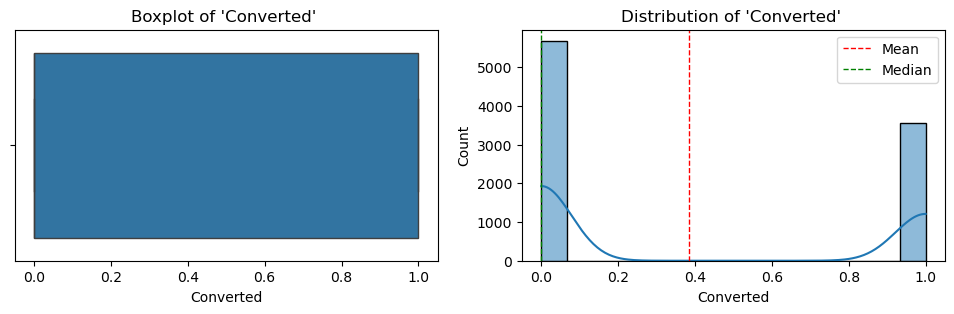

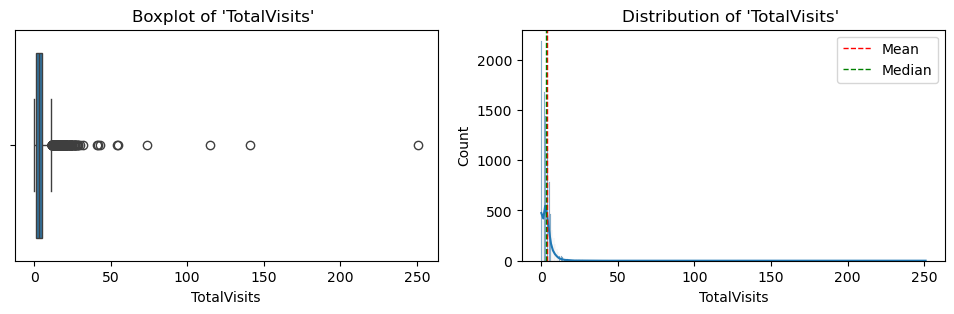

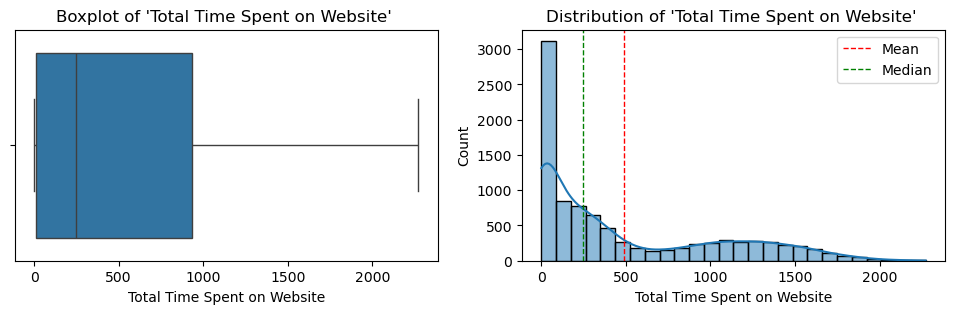

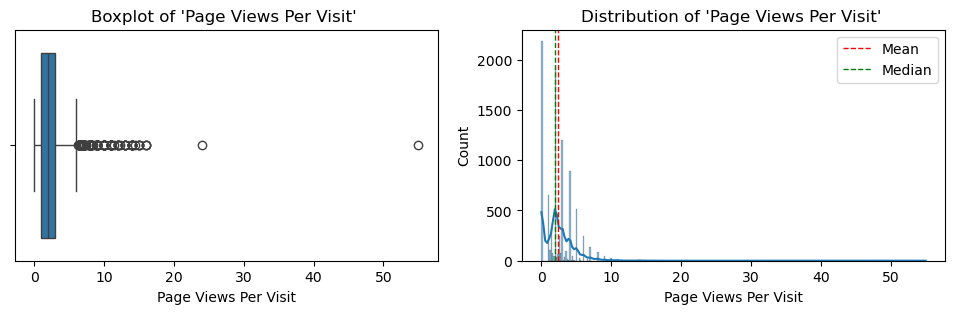

In [108]:
# Now lets Visualize the distribution of Data across all numerical Columns
for col in num_var:
    plot_box_histogram(Lead_df[col])

>**Insight,**
>- From all the above, Boxplot and Histogram charts, we can see there are some Outliers in numeric variables.
>- To get the Accurate analysis and prediction, we need to treat these Outliers before Model Building.

### **5.3** : Let's visualize Percentile Scatterplot of all numeric variables, for better understanding of Outliers.

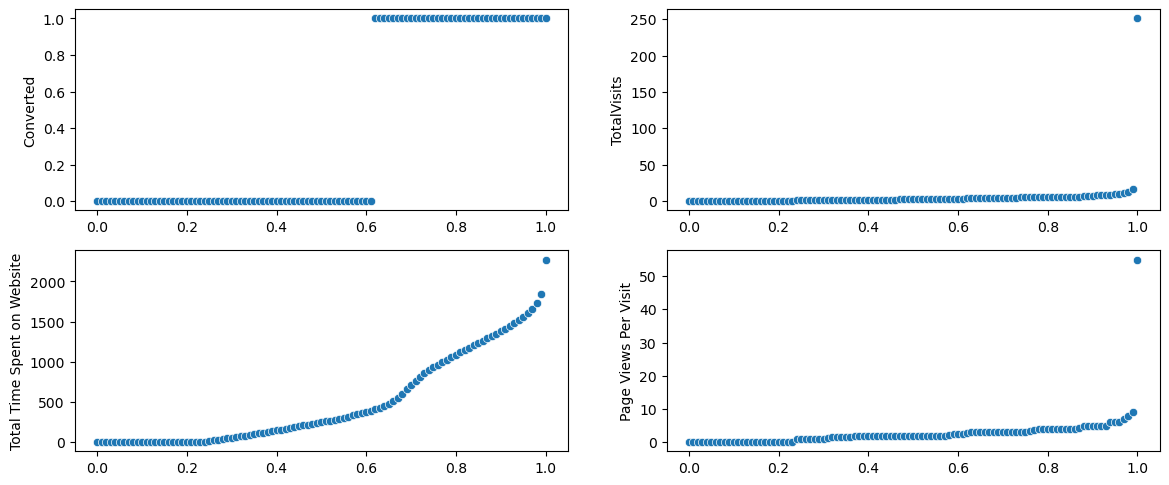

In [111]:
# Creating scatterplot of percentile, to check for outliers in all numerical columns.

i = 1
plt.figure(figsize=[14,12])
for col in num_var: 
    plt.subplot(4,2,i)
    sns.scatterplot(Lead_df[col].quantile( np.arange(0, 1.01, 0.01) ))
    i = i+1
plt.show()

**Insight,**
>- From Percentile scatterplot we can clearly see that, there are some outliers in **`TotalVisits`** and **`Page Views Per Visit`**.
>- Also, we can see **`Converted`** is having **`Binary Values`**, which is our target variable.

***

<a id="6"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [06. <u>Handling Outliers in Numeric Variables](#0) </br></Left></h1>

_Outliers are extreme values that deviate from the normal range of values in a dataset. Outliers can distort the results of data analysis, and should be identified and treated accordingly. Their are many techniques to handle outliers in the dataset.<br>
One of the common technique to treat outliers is by using **The Percentile Method.** <br>It involves calculating the threshold values based on percentiles and replacing any data points that exceed these thresholds with the corresponding threshold values._

### **6.1** : Outlier Analysis of **`TotalVisits`** Column

In [116]:
# Checking Top 5% of data points (i.e. 95-100 percentile values) of 'TotalVisits'
Lead_df['TotalVisits'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95     10.0
0.96     10.0
0.97     11.0
0.98     13.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [117]:
# Capping 'TotalVisits' at 99th percentile Value (i.e. 1% of data points are considered outliers)
Lead_df.loc[Lead_df['TotalVisits'] > Lead_df['TotalVisits'].quantile(0.99) , ['TotalVisits'] ] = Lead_df['TotalVisits'].quantile(0.99)


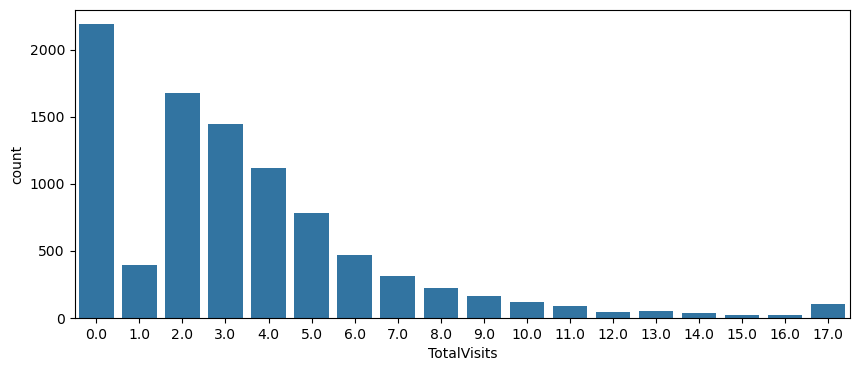

In [118]:
# Let's visualize the Countplot of 'TotalVisits'
plt.figure(figsize=[10,4])
sns.countplot(x=Lead_df['TotalVisits'])
plt.show()

### **6.2** : Outlier Analysis of **`Page Views Per Visit`** column

In [120]:
# Checking Top 5% of data points (i.e. 95-100 percentile values) of 'Page Views Per Visit' column
Lead_df['Page Views Per Visit'].quantile([0.95,0.96,0.97,0.98,0.99,1])


0.95     6.0
0.96     6.0
0.97     7.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [121]:
# Now, Capping 'Page Views Per Visit' at 99th percentile Value (i.e. 1% of data points are considered outliers)
Lead_df.loc[Lead_df['Page Views Per Visit'] > Lead_df['Page Views Per Visit'].quantile(0.99) , ['Page Views Per Visit'] ] = Lead_df['Page Views Per Visit'].quantile(0.99)


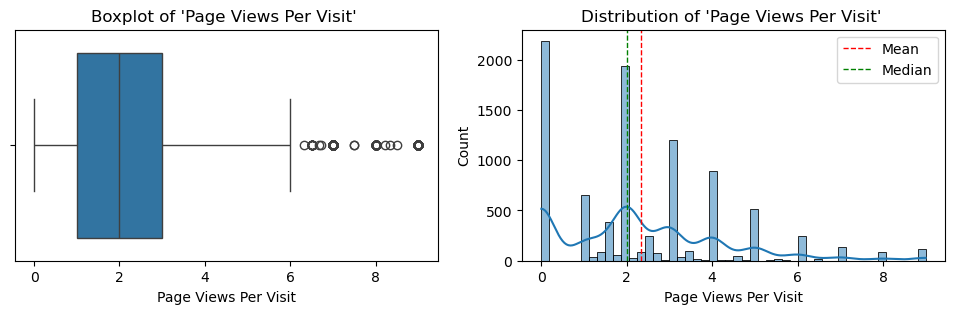

In [122]:
# Let's visualize the change in dustribution of 'Page Views Per Visit'
plot_box_histogram(Lead_df['Page Views Per Visit'])

### **6.3** : Outlier Analysis of **`Total Time Spent on Website`** column

In [124]:
# Checking Top 5% of data points (i.e. 95-100 percentile values) of 'Total Time Spent on Website'
Lead_df['Total Time Spent on Website'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95    1562.00
0.96    1606.00
0.97    1660.00
0.98    1734.00
0.99    1840.61
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64

In [125]:
# Capping 'Total Time Spent on Website' at 99th percentile Value (i.e. 1% of data points are considered outliers)
Lead_df.loc[Lead_df['Total Time Spent on Website'] > Lead_df['Total Time Spent on Website'].quantile(0.99) , ['Total Time Spent on Website'] ] = Lead_df['Total Time Spent on Website'].quantile(0.99)

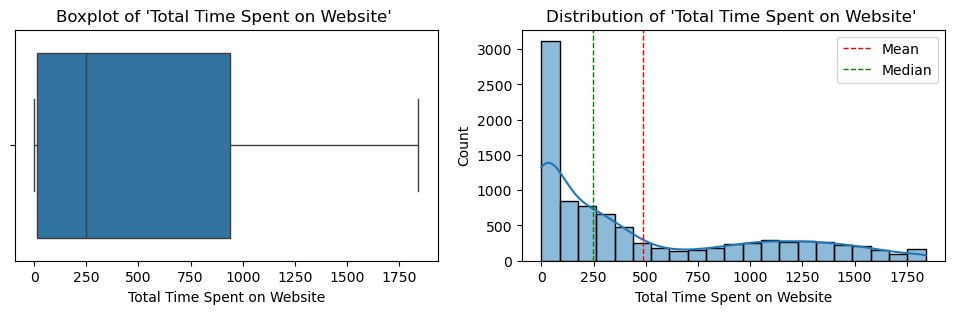

In [126]:
# Let's visualize the change in dustribution of 'Total Time Spent on Website'
plot_box_histogram(Lead_df['Total Time Spent on Website'])

### **6.4** : Let's check Descriptive Statistical Summary of our Dataset 

In [128]:
# Checking Descriptive Statistical Summary of our dataset
Lead_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.327814,486.510793,2.329050
std,0.486714,3.228466,544.845436,1.971347
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,17.000000,1840.610000,9.000000


***

<a id="7"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [07. <u>Analysis of Categorical Variables](#0) </br></Left></h1>

### **7.1** : Now, let's update the Categorical Variables in **`cat_var`**

In [131]:
# Checking all the categorical variables in `cat_var`
cat_var = Lead_df.select_dtypes(exclude='number').columns
cat_var

Index(['Lead Origin', 'Do Not Email', 'Do Not Call',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Grouped_Specialization', 'Grouped_Last_Activity',
       'Grouped_Lead_Source'],
      dtype='object')

### **7.2** : Visualizing Countplot of all the Categorical Variables

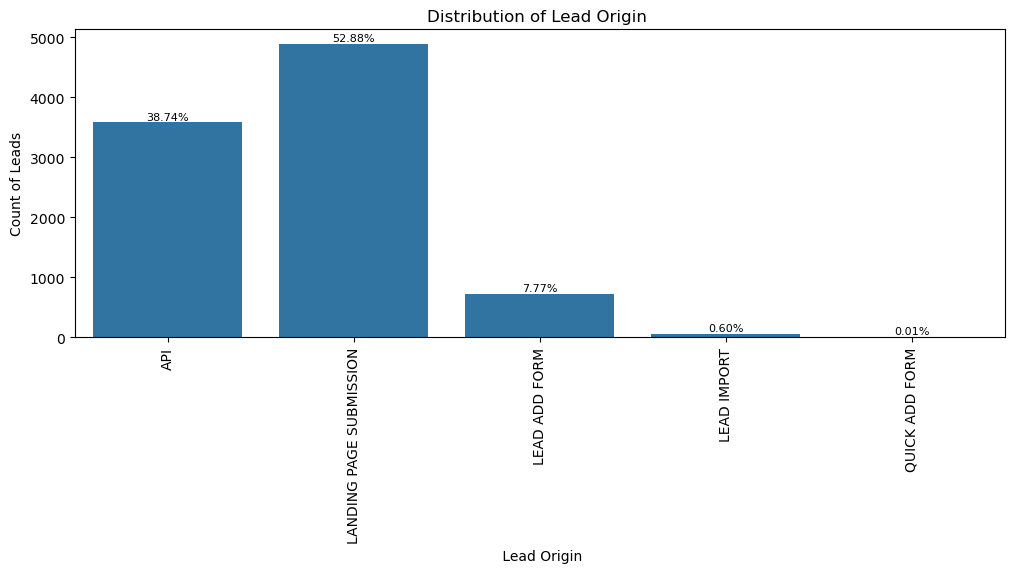

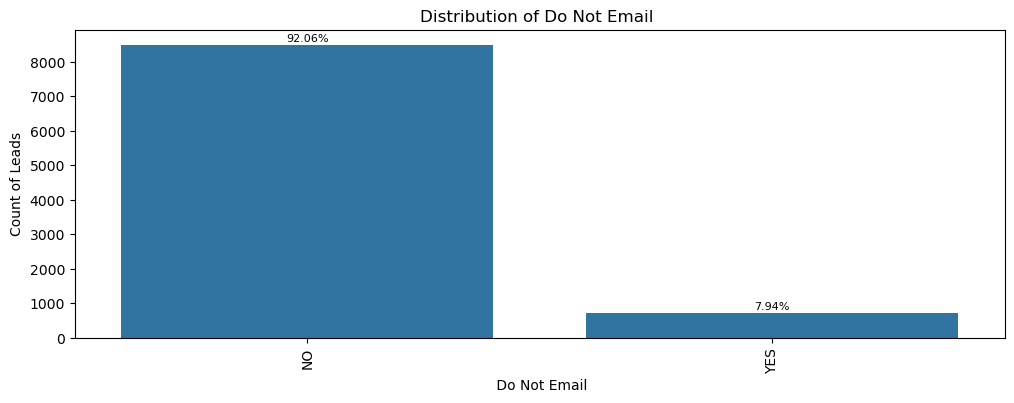

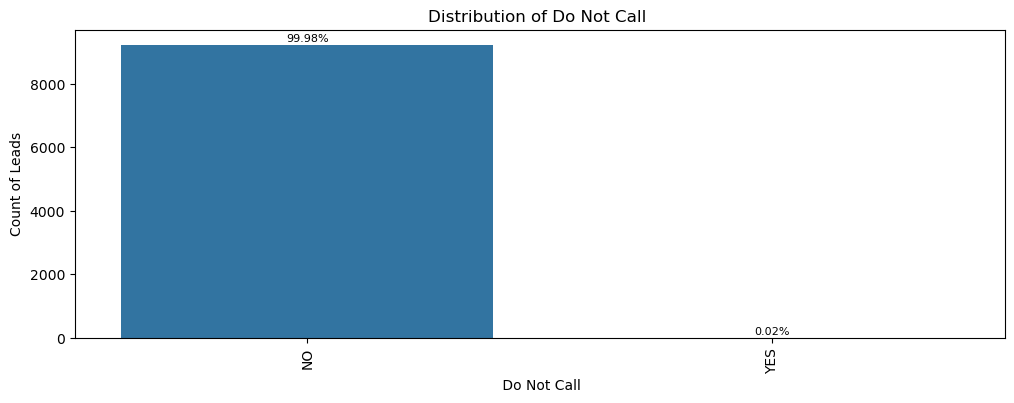

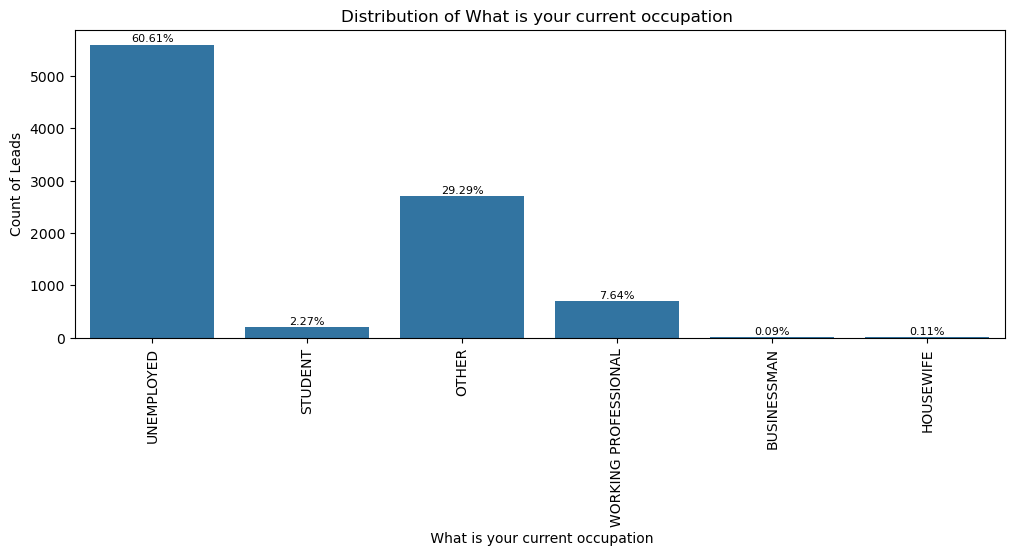

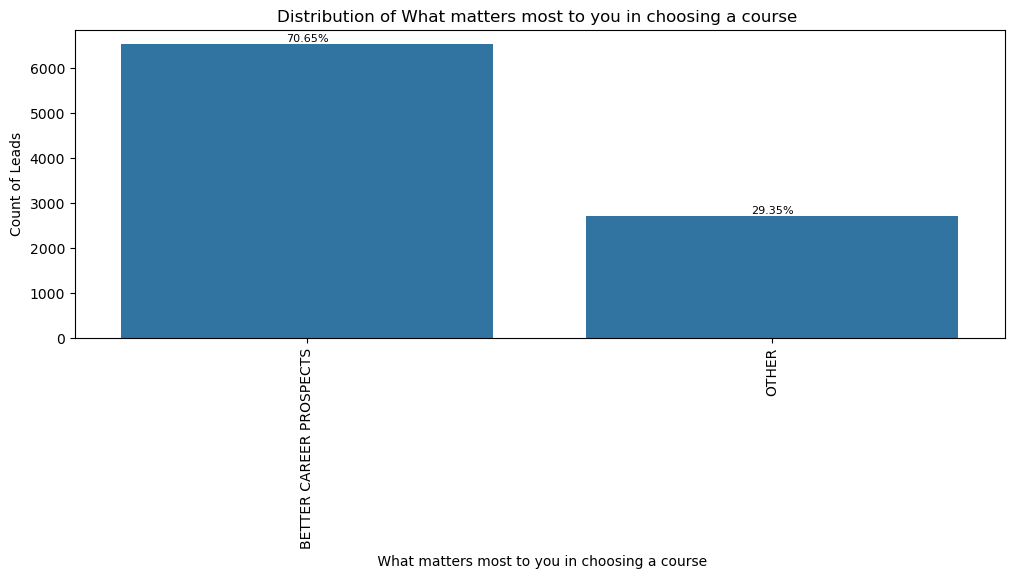

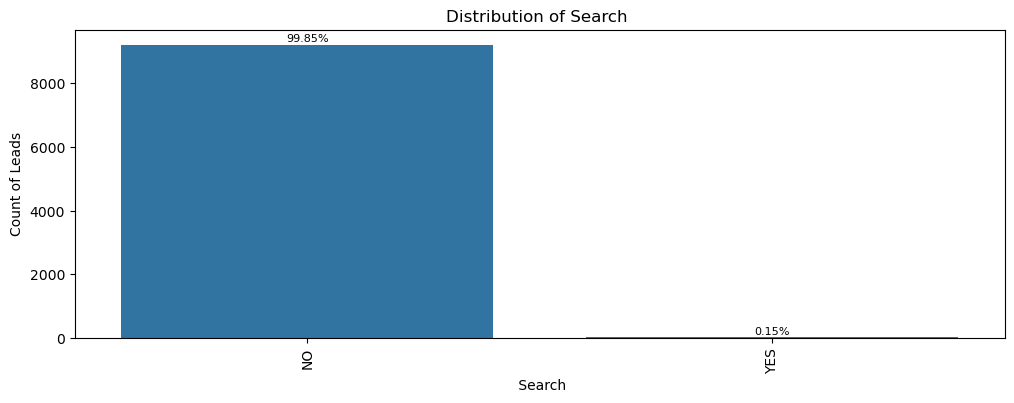

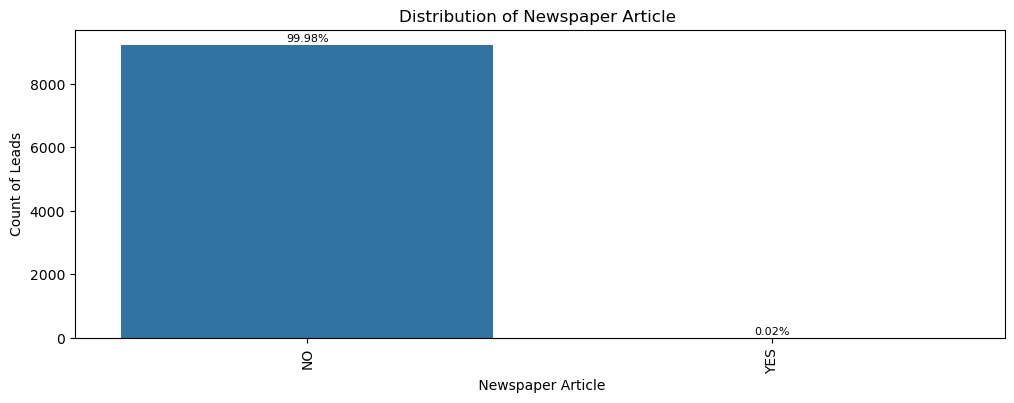

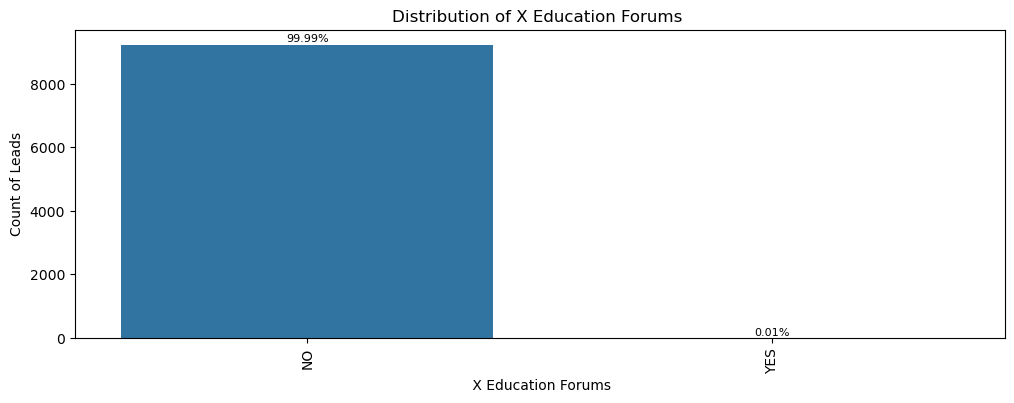

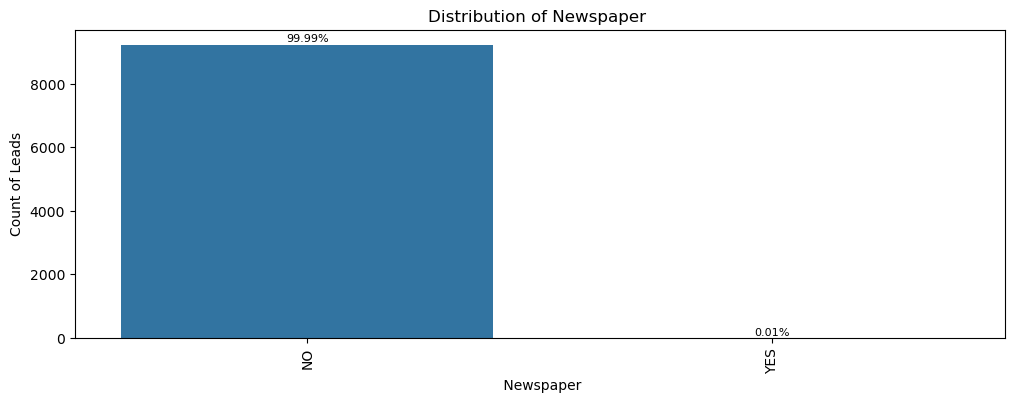

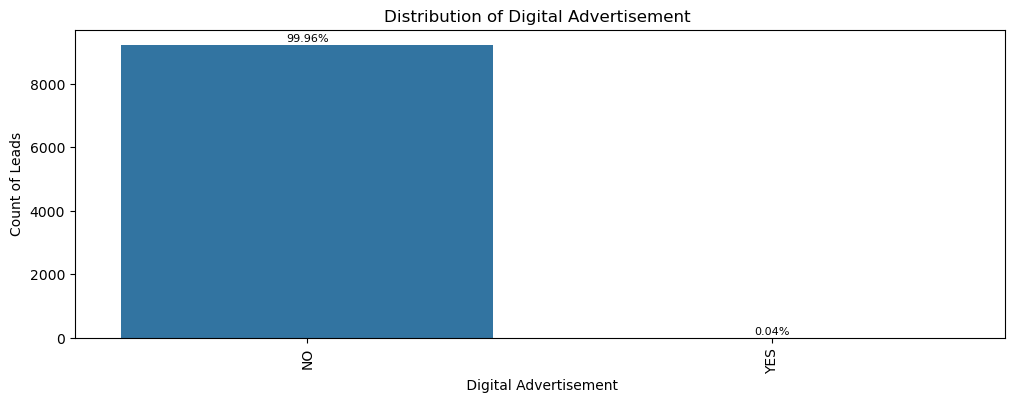

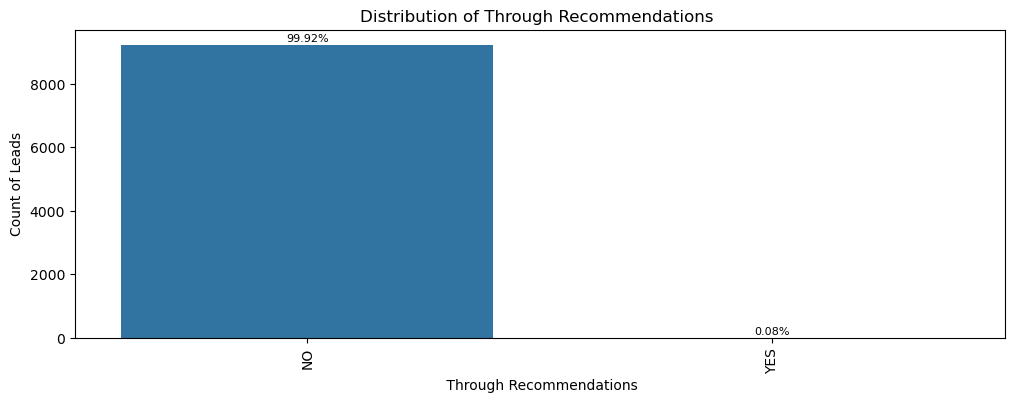

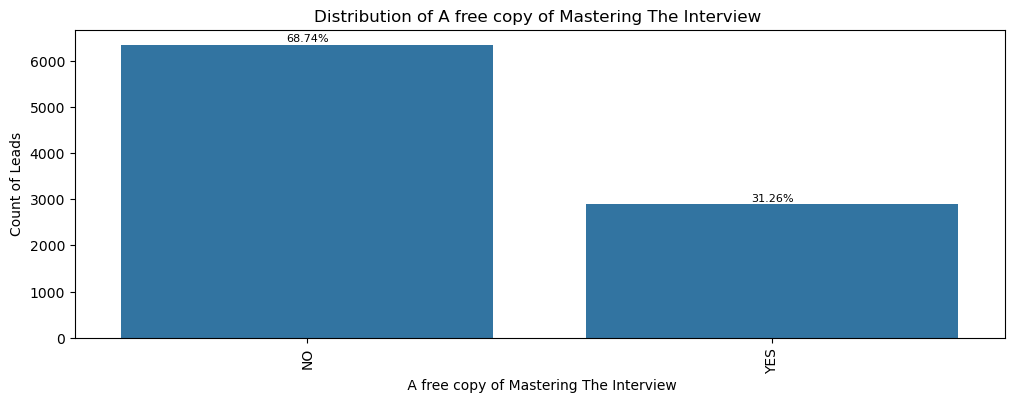

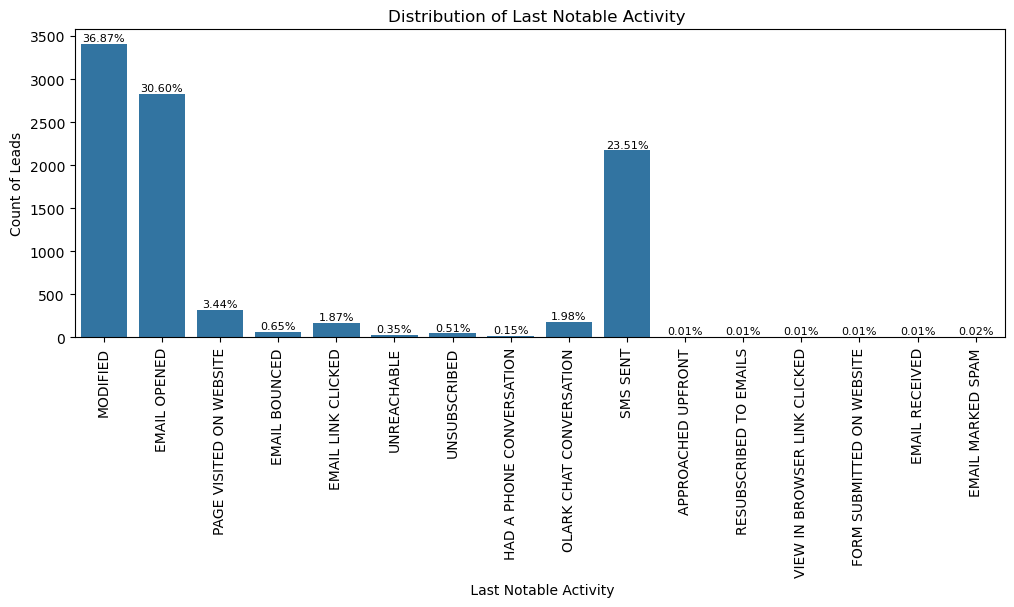

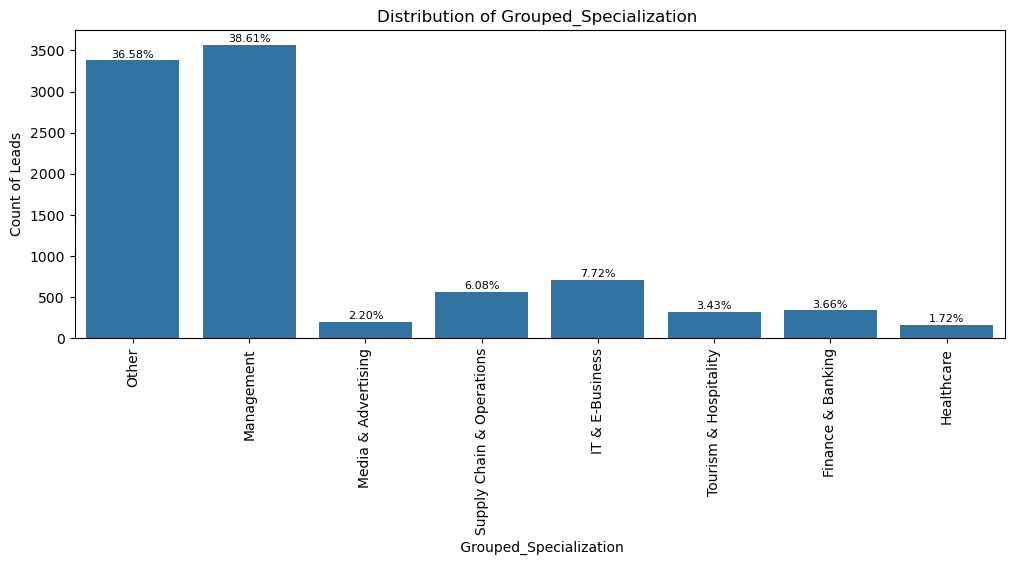

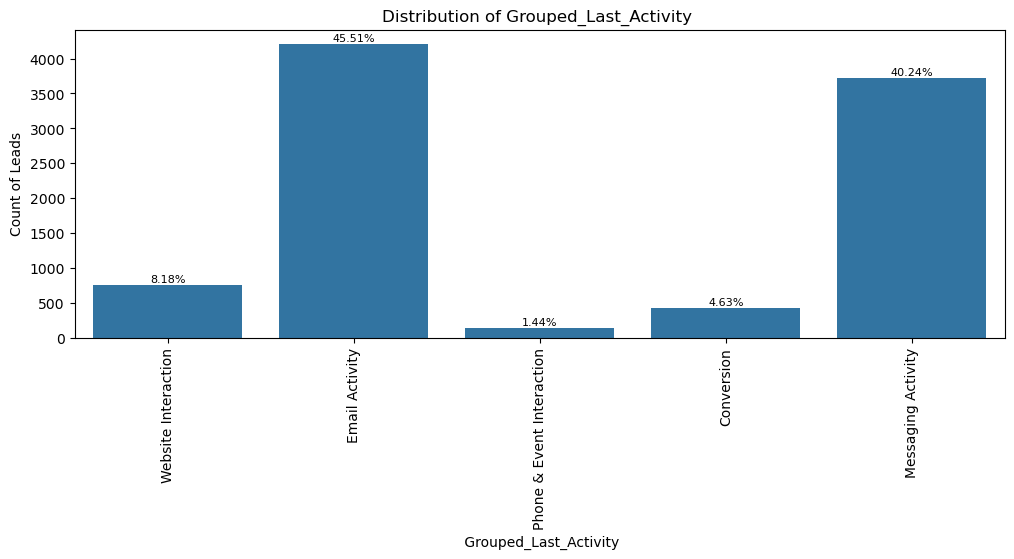

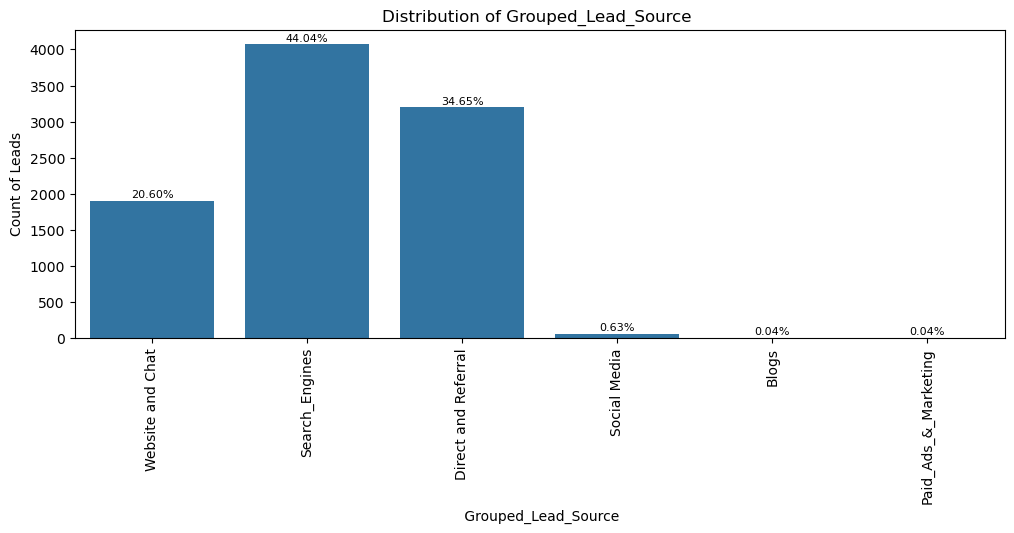

In [133]:
# Let's Visualize the Percentage of Lead Count for all the Categories
for col in cat_var:
    plt.figure(figsize=[12,4])
    ax = sns.countplot(x=Lead_df[col])
    plt.title(f"Distribution of {col} ")
    plt.xlabel(f" {col}")
    plt.ylabel(f"Count of Leads")
    plt.xticks(rotation=90)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / len(Lead_df):.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count), ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 2),
                    textcoords='offset points')
plt.show()

**Insight,**
> **From above countplot of all the Categorical Variables, we can see that :**
>- Some Columns are Highly Biased, i.e they are having more than 99% of only one type of Data. Thus we can Drop them as they can skew our analysis. These columns are **`Do Not Call`**, **`Search`**, **`Newspaper Article`**, **`X Education Forums`**, **`Newspaper`**, **`Digital Advertisement`** and **`Through Recommendations`**. 

### **7.3** : Dropping Highly Biased Variables

In [136]:
# Dropping Variables with Highly Biased Data.
Lead_df.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'] , 
            axis=1 , inplace=True )
# Checking Shape Change
Lead_df.shape

(9240, 13)

### **7.4** : Droping **`Last Notable Activity`** column.
_As per the Data Dictionary, **`Last Notable Activity`** and **`Last Activity`** both are recording same data i.e. the last notable acitivity performed by the student.<br>
Thus, we can drop **`Last Notable Activity`** column._

In [138]:
# Dropping 'Last Notable Activity' column 
Lead_df.drop(['Last Notable Activity'], axis=1, inplace=True)


### **7.5** : Let's check Descriptive Stats of our Dataset

In [140]:
# Checking Descriptive Stats of our dataset
Lead_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Lead Origin,9240,5,LANDING PAGE SUBMISSION,4886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Do Not Email,9240,2,NO,8506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Converted,9240.0,NaN,NaN,NaN,0.38539,0.486714,0.0,0.0,0.0,1.0,1.0
TotalVisits,9240.0,NaN,NaN,NaN,3.327814,3.228466,0.0,1.0,3.0,5.0,17.0
Total Time Spent on Website,9240.0,NaN,NaN,NaN,486.510793,544.845436,0.0,12.0,248.0,936.0,1840.61
Page Views Per Visit,9240.0,NaN,NaN,NaN,2.32905,1.971347,0.0,1.0,2.0,3.0,9.0
What is your current occupation,9240,6,UNEMPLOYED,5600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What matters most to you in choosing a course,9240,2,BETTER CAREER PROSPECTS,6528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A free copy of Mastering The Interview,9240,2,NO,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grouped_Specialization,9240,8,Management,3568,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***

<a id="8"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [08. <u>Creating Dummy Variables of all Categorical Columns](#0) </br></Left></h1>

In [142]:
# Let's Update Variables in `num_var` and `cat_var`
num_var = Lead_df.select_dtypes(include='number').columns
print(num_var)

# Updating cat_var
cat_var = Lead_df.select_dtypes(exclude='number').columns
print(cat_var)

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
Index(['Lead Origin', 'Do Not Email', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Grouped_Specialization',
       'Grouped_Last_Activity', 'Grouped_Lead_Source'],
      dtype='object')


### **8.1** : Creating Dummy variables using **`Get_Dummies`** and dropping first dummy of each variable.

In [144]:
# Creating a dummy variable for the categorical variables and dropping the first one.
Lead_dummy = pd.get_dummies(Lead_df[cat_var], drop_first=True, dtype=int)
Lead_dummy.head()

,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,What is your current occupation_OTHER,What is your current occupation_STUDENT,What is your current occupation_UNEMPLOYED,What is your current occupation_WORKING PROFESSIONAL,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Last_Activity_Email Activity,Grouped_Last_Activity_Messaging Activity,Grouped_Last_Activity_Phone & Event Interaction,Grouped_Last_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### **8.2** : Joining Dummy Dataframe with the Numeric Columns 

In [146]:
#  Concatenating Dummy variables with Numerical Variables into New Dataframe.
Lead_data = pd.concat([Lead_df[num_var], Lead_dummy] , axis=1)
Lead_data.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Last_Activity_Email Activity,Grouped_Last_Activity_Messaging Activity,Grouped_Last_Activity_Phone & Event Interaction,Grouped_Last_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,2.0,1532.0,2.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1.0,305.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,2.0,1428.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


***

<a id="9"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [09. <u>Creating Correlation Matrix](#0) </br></Left></h1>

In [148]:
# Creating Correlation Matrix of all the variables of `Lead_data` Dataset
Lead_data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Last_Activity_Email Activity,Grouped_Last_Activity_Messaging Activity,Grouped_Last_Activity_Phone & Event Interaction,Grouped_Last_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
Converted,1.000000,0.043716,0.363576,-0.004603,-0.051236,0.321702,-0.023695,0.013138,-0.135580,0.041567,...,-0.002649,-0.073932,0.171466,0.020057,-0.091155,0.049058,-0.005789,0.020090,-0.023517,-0.077202
TotalVisits,0.043716,1.000000,0.325754,0.706203,0.408685,-0.237099,-0.044902,-0.001056,0.008974,-0.008440,...,0.095789,0.015520,-0.115521,0.033606,0.238528,0.035248,0.023672,0.352312,-0.042452,-0.466872
Total Time Spent on Website,0.363576,0.325754,1.000000,0.337851,0.277148,-0.140238,-0.034961,0.025858,-0.046534,0.007201,...,0.058680,-0.005519,-0.011282,0.019321,0.029889,0.075081,0.006875,0.251200,-0.032739,-0.390969
Page Views Per Visit,-0.004603,0.706203,0.337851,1.000000,0.520359,-0.279637,-0.051459,-0.001737,0.023875,-0.007999,...,0.116653,0.038508,-0.081696,0.042765,0.107996,0.042830,0.027538,0.421578,-0.047329,-0.560258
Lead Origin_LANDING PAGE SUBMISSION,-0.051236,0.408685,0.277148,0.520359,1.000000,-0.307485,-0.081974,-0.011021,0.095304,-0.001898,...,0.123134,0.043733,-0.126021,0.019425,0.105393,0.349372,0.019645,0.115020,-0.075958,-0.539501
Lead Origin_LEAD ADD FORM,0.321702,-0.237099,-0.140238,-0.279637,-0.307485,1.000000,-0.022461,-0.003020,-0.020983,0.039627,...,-0.025837,0.012378,0.039646,0.019228,-0.052723,0.242276,-0.006041,-0.229795,-0.023069,0.002126
Lead Origin_LEAD IMPORT,-0.023695,-0.044902,-0.034961,-0.051459,-0.081974,-0.022461,1.000000,-0.000805,-0.017529,-0.002547,...,-0.006856,0.050772,-0.029067,-0.009351,-0.023099,-0.056352,-0.001610,-0.065809,0.955821,-0.039410
Lead Origin_QUICK ADD FORM,0.013138,-0.001056,0.025858,-0.001737,-0.011021,-0.003020,-0.000805,1.000000,0.035416,-0.000342,...,-0.001961,0.011384,-0.008537,-0.001257,-0.003106,-0.007576,-0.000217,0.011728,-0.000827,-0.005298
Do Not Email_YES,-0.135580,0.008974,-0.046534,0.023875,0.095304,-0.020983,-0.017529,0.035416,1.000000,-0.009669,...,0.054569,0.039353,-0.050884,-0.001899,0.068548,0.081277,0.032365,-0.035657,-0.013212,-0.050640
What is your current occupation_HOUSEWIFE,0.041567,-0.008440,0.007201,-0.007999,-0.001898,0.039627,-0.002547,-0.000342,-0.009669,1.000000,...,-0.006204,0.029408,-0.027009,-0.003978,0.002183,0.010615,-0.000685,0.003954,-0.002616,-0.016763


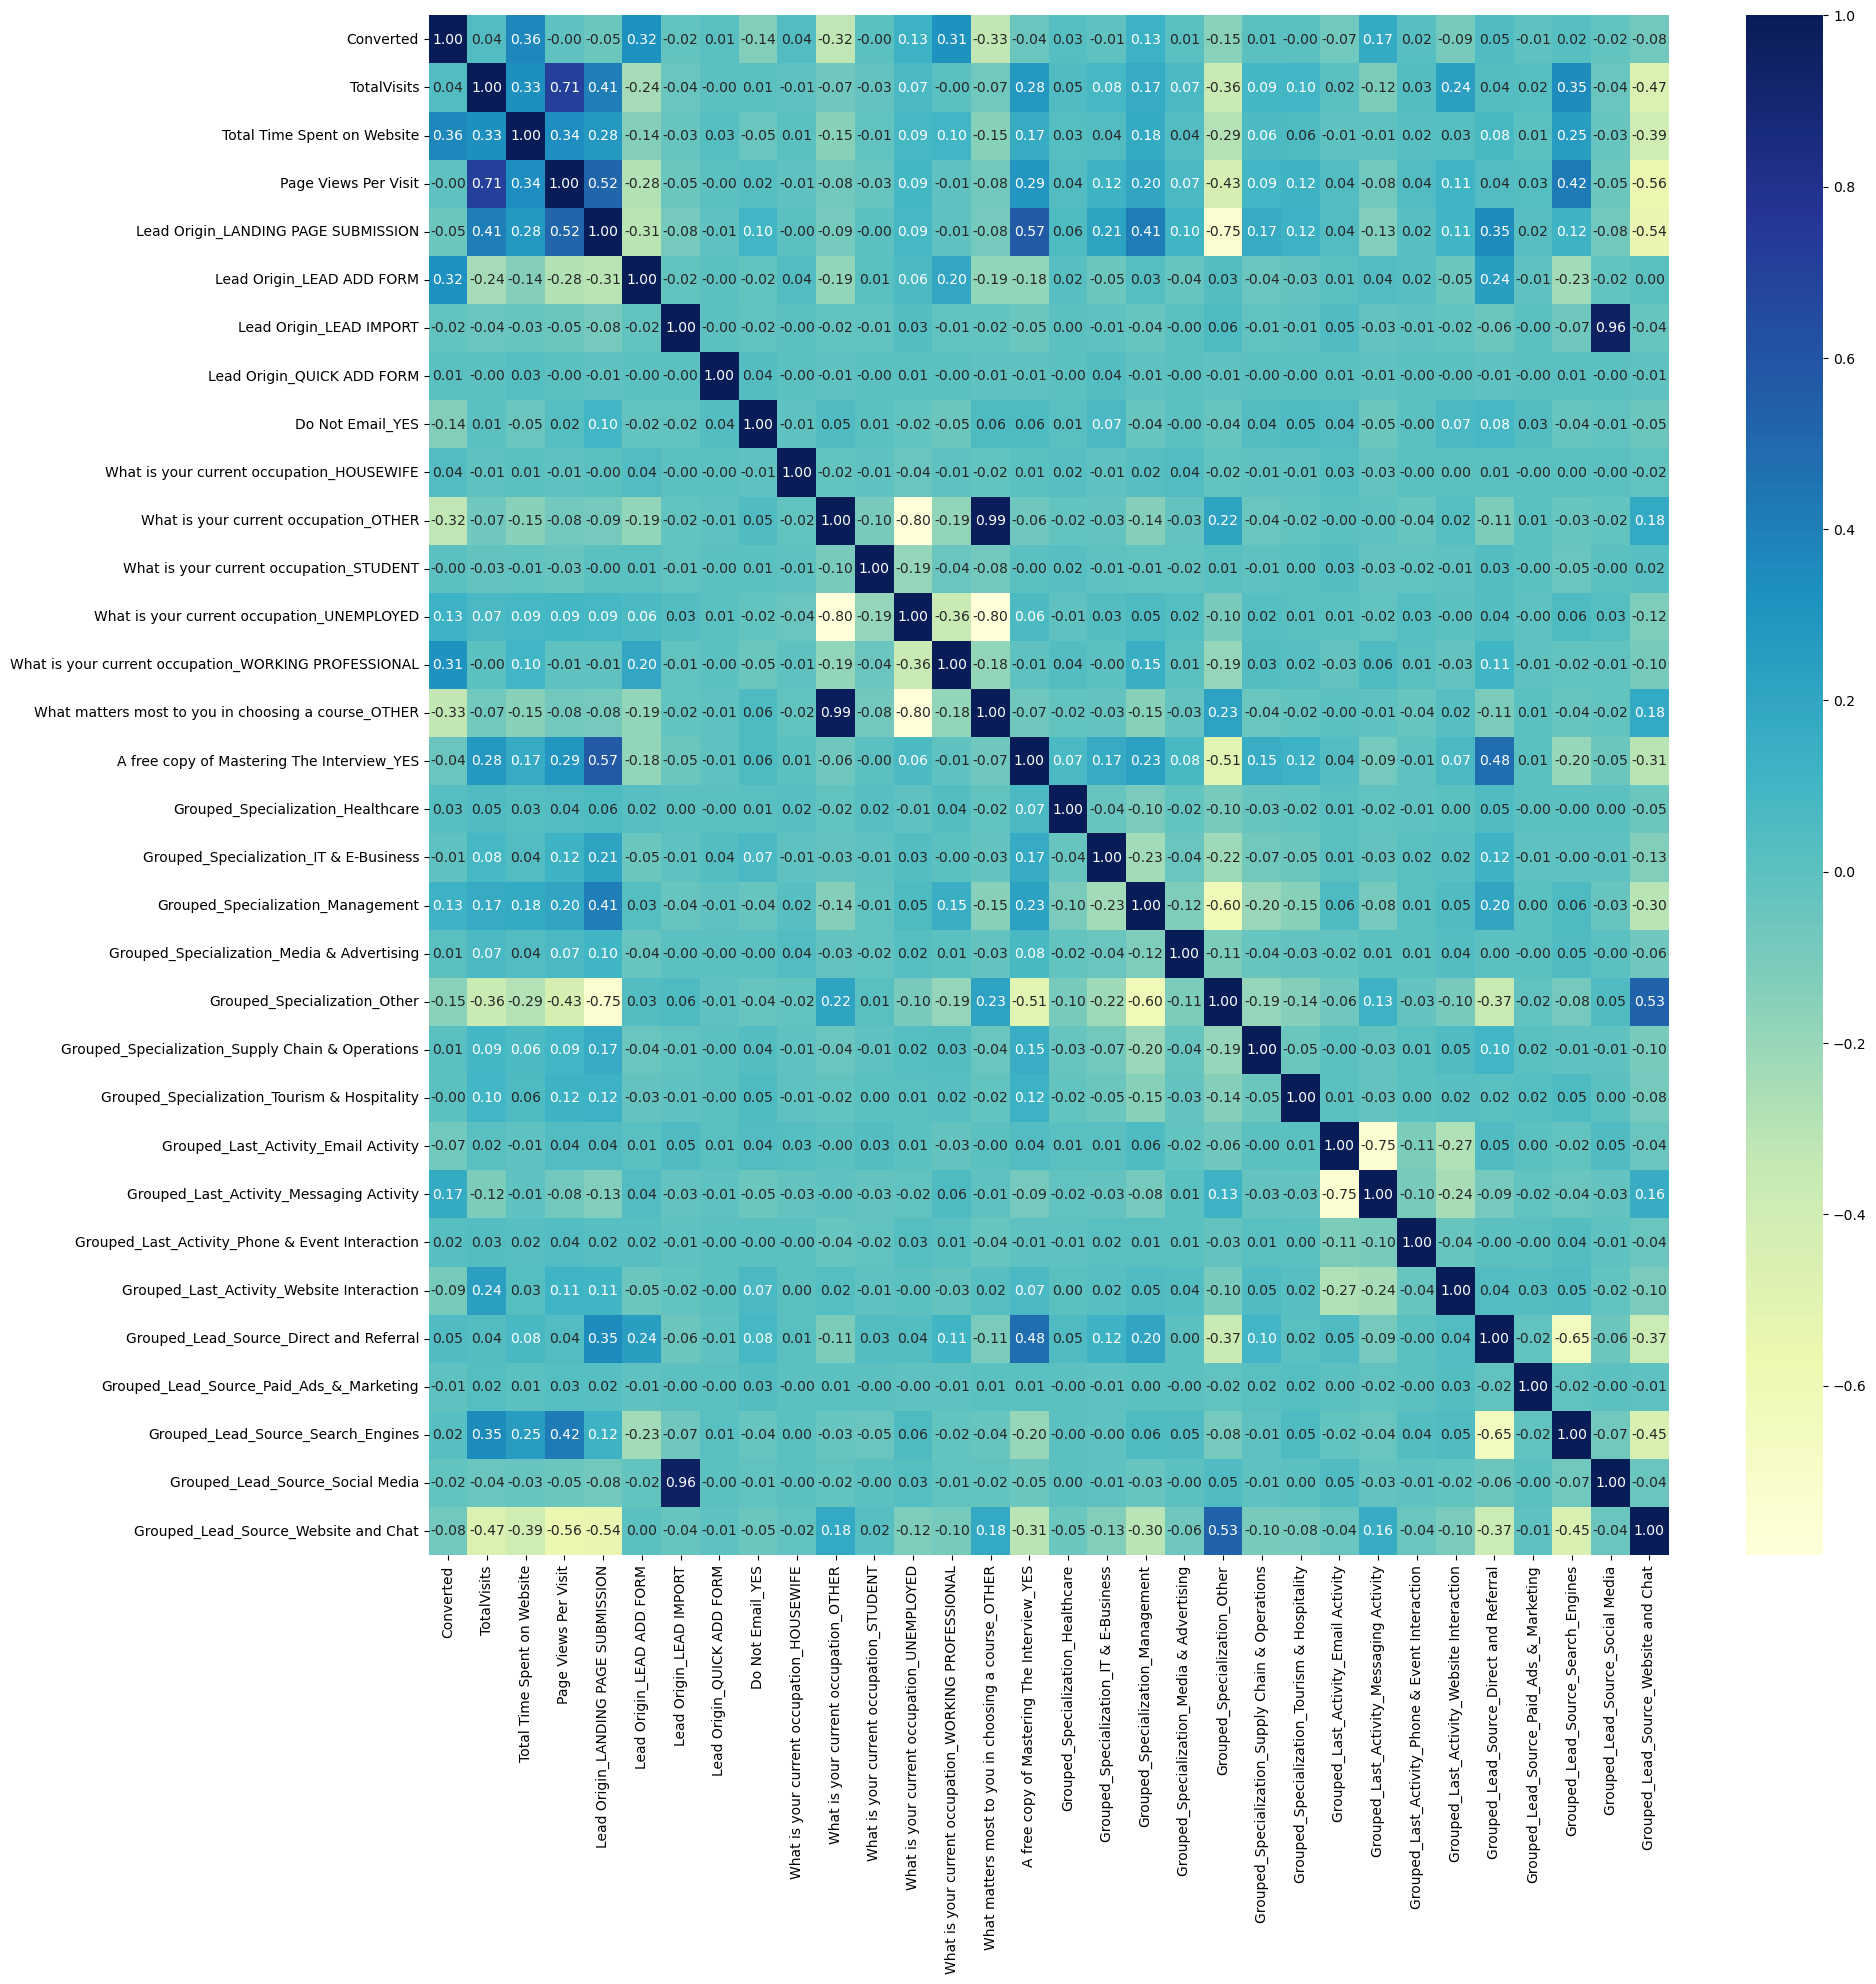

In [149]:
# Creating heatmap of Correlation Matrix for all variables of `Lead_data` Dataset
plt.figure(figsize=[20,20])
sns.heatmap(Lead_data.corr(), cmap="YlGnBu", annot = True, fmt=".2f" )
plt.show()

In [150]:
# Storing all the Features Names `col`
col = Lead_data.columns
col

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_LANDING PAGE SUBMISSION',
       'Lead Origin_LEAD ADD FORM', 'Lead Origin_LEAD IMPORT',
       'Lead Origin_QUICK ADD FORM', 'Do Not Email_YES',
       'What is your current occupation_HOUSEWIFE',
       'What is your current occupation_OTHER',
       'What is your current occupation_STUDENT',
       'What is your current occupation_UNEMPLOYED',
       'What is your current occupation_WORKING PROFESSIONAL',
       'What matters most to you in choosing a course_OTHER',
       'A free copy of Mastering The Interview_YES',
       'Grouped_Specialization_Healthcare',
       'Grouped_Specialization_IT & E-Business',
       'Grouped_Specialization_Management',
       'Grouped_Specialization_Media & Advertising',
       'Grouped_Specialization_Other',
       'Grouped_Specialization_Supply Chain & Operations',
       'Grouped_Specialization_Tourism & Hospitality',
       'Grouped_Last

***

<a id="10"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [10. <u>Feature Scaling](#0) </br></Left></h1>

### **10.1** : Normalization of the Dataset using Min-Max Normalization

In [153]:
# Creating copy of our Dataset
Lead_data_scaled = pd.DataFrame(Lead_data)
Lead_data_scaled.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Last_Activity_Email Activity,Grouped_Last_Activity_Messaging Activity,Grouped_Last_Activity_Phone & Event Interaction,Grouped_Last_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,2.0,1532.0,2.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1.0,305.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,2.0,1428.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [246]:
# Importing required Min-maxScaler libriary
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()
Lead_data_scaled[col] = my_scaler.fit_transform(Lead_data[col])

# Checking Descripetive Stats of Scaled Dataset
Lead_data_scaled.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Last_Activity_Email Activity,Grouped_Last_Activity_Messaging Activity,Grouped_Last_Activity_Phone & Event Interaction,Grouped_Last_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,0.195754,0.264320,0.258783,0.528788,0.077706,0.005952,0.000108,0.079437,0.001082,...,0.034307,0.455087,0.402381,0.014394,0.081818,0.346537,0.000433,0.440368,0.006277,0.205952
std,0.486714,0.189910,0.296014,0.219039,0.499198,0.267722,0.076926,0.010403,0.270435,0.032882,...,0.182027,0.498006,0.490404,0.119115,0.274102,0.475892,0.020803,0.496458,0.078983,0.404418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.058824,0.006520,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.176471,0.134738,0.222222,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.294118,0.508527,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [248]:
# Checking Columns in our Dataset
Lead_data_scaled.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_LANDING PAGE SUBMISSION',
       'Lead Origin_LEAD ADD FORM', 'Lead Origin_LEAD IMPORT',
       'Lead Origin_QUICK ADD FORM', 'Do Not Email_YES',
       'What is your current occupation_HOUSEWIFE',
       'What is your current occupation_OTHER',
       'What is your current occupation_STUDENT',
       'What is your current occupation_UNEMPLOYED',
       'What is your current occupation_WORKING PROFESSIONAL',
       'What matters most to you in choosing a course_OTHER',
       'A free copy of Mastering The Interview_YES',
       'Grouped_Specialization_Healthcare',
       'Grouped_Specialization_IT & E-Business',
       'Grouped_Specialization_Management',
       'Grouped_Specialization_Media & Advertising',
       'Grouped_Specialization_Other',
       'Grouped_Specialization_Supply Chain & Operations',
       'Grouped_Specialization_Tourism & Hospitality',
       'Grouped_Last

***

<a id="11"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [11. <u>Model Building using Logistic Regression](#0) </br></Left></h1>

### **11.1** : Splitting Data into Training set and Test set.
_As you know, the first basic step for regression is performing a train-test split._

In [250]:
# Putting feature variable to X
X = Lead_data_scaled.drop(['Converted'], axis=1)

# Putting Target variable to y
y = Lead_data_scaled['Converted']

In [252]:
# Let's Checking the Lead Conversion rate
(sum(Lead_data_scaled['Converted'])/len(Lead_data_scaled['Converted']))*100

38.53896103896104

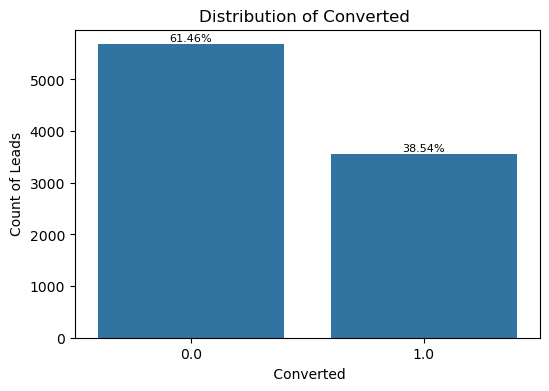

In [254]:
# Checking Distribution of our Target Variable
plt.figure(figsize=[6,4])
ax = sns.countplot(x=Lead_data_scaled['Converted'])
plt.title(f"Distribution of Converted ")
plt.xlabel(f" Converted")
plt.ylabel(f"Count of Leads")
#plt.xticks(rotation=90)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / len(Lead_data_scaled):.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count), ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 2),
                    textcoords='offset points')
plt.show()

In [256]:
# Importing required library
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape , X_test.shape

((6930, 31), (2310, 31))

### **11.2** : Running First **LogisticRegression Model `logm1`**

In [259]:
# Importing required Libraries
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=50)
logm1 = logreg.fit(X_train, y_train)

In [261]:
# Checking `Score` i.e. the mean accuracy of the given Train data 
logm1.score(X_train, y_train)

0.8083694083694084

In [263]:
# Checking `Score` i.e. the mean accuracy of the given test data 
logm1.score(X_test, y_test)

0.8168831168831169

### **11.3** : Feature Selection using **Recursive Feature Elimination (RFE)**

_**Recursive Feature Elimination** is a feature selection method to identify a dataset’s key features. The process involves developing a model with the remaining features after repeatedly removing the least significant parts until the desired number of features is obtained._

In [268]:
# Importing required Libraries
from sklearn.feature_selection import RFE

logreg = LogisticRegression(random_state=50)
rfe = RFE(logreg, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [272]:
# Checking `Score` i.e. the mean accuracy of the given Train data 
rfe.score(X_train, y_train)

0.8075036075036075

In [274]:
# Checking `Score` i.e. the mean accuracy of the given test data 
rfe.score(X_test,y_test)

0.8168831168831169

In [276]:
rfe.support_

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False,  True])

In [278]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_LANDING PAGE SUBMISSION', True, 1),
 ('Lead Origin_LEAD ADD FORM', True, 1),
 ('Lead Origin_LEAD IMPORT', False, 14),
 ('Lead Origin_QUICK ADD FORM', False, 10),
 ('Do Not Email_YES', True, 1),
 ('What is your current occupation_HOUSEWIFE', True, 1),
 ('What is your current occupation_OTHER', True, 1),
 ('What is your current occupation_STUDENT', True, 1),
 ('What is your current occupation_UNEMPLOYED', False, 2),
 ('What is your current occupation_WORKING PROFESSIONAL', True, 1),
 ('What matters most to you in choosing a course_OTHER', True, 1),
 ('A free copy of Mastering The Interview_YES', False, 13),
 ('Grouped_Specialization_Healthcare', False, 17),
 ('Grouped_Specialization_IT & E-Business', False, 16),
 ('Grouped_Specialization_Management', False, 15),
 ('Grouped_Specialization_Media & Advertising', False, 6),
 ('Grouped_Specialization_Other', True, 1),
 ('G

In [280]:
# Updating Selected Features in `col` variable 
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_LANDING PAGE SUBMISSION', 'Lead Origin_LEAD ADD FORM',
       'Do Not Email_YES', 'What is your current occupation_HOUSEWIFE',
       'What is your current occupation_OTHER',
       'What is your current occupation_STUDENT',
       'What is your current occupation_WORKING PROFESSIONAL',
       'What matters most to you in choosing a course_OTHER',
       'Grouped_Specialization_Other', 'Grouped_Last_Activity_Email Activity',
       'Grouped_Last_Activity_Messaging Activity',
       'Grouped_Last_Activity_Phone & Event Interaction',
       'Grouped_Lead_Source_Website and Chat'],
      dtype='object')

In [282]:
# Lets check Features that are not selected
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_LEAD IMPORT',
       'Lead Origin_QUICK ADD FORM',
       'What is your current occupation_UNEMPLOYED',
       'A free copy of Mastering The Interview_YES',
       'Grouped_Specialization_Healthcare',
       'Grouped_Specialization_IT & E-Business',
       'Grouped_Specialization_Management',
       'Grouped_Specialization_Media & Advertising',
       'Grouped_Specialization_Supply Chain & Operations',
       'Grouped_Specialization_Tourism & Hospitality',
       'Grouped_Last_Activity_Website Interaction',
       'Grouped_Lead_Source_Direct and Referral',
       'Grouped_Lead_Source_Paid_Ads_&_Marketing',
       'Grouped_Lead_Source_Search_Engines',
       'Grouped_Lead_Source_Social Media'],
      dtype='object')

### **11.4** : Assessing Our Model with StatsModels

In [285]:
# Importing required Library
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6914
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2957.2
Date:                Sun, 22 Sep 2024   Deviance:                       5914.5
Time:                        15:25:03   Pearson chi2:                 8.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3824
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1669      0.169    -12.854      0.000      -2.497      -1.836
TotalVisits                                              0.9231      0.203      4.547      0.000       0.525       1.321
Total Time Spent on Website                              3.6532      0.129     28.412      0.000       3.401       3.905
Lead Origin_LANDING PAGE SUBMISSION                     -0.8066      0.118     -6.846      0.000      -1.038      -0.576
Lead Origin_LEAD ADD FORM                                3.4034      0.192     17.756      0.000       3.028       3.779
Do Not Email_YES                                        -1.2692      0.154     -8.256      0.000      -1.571      -0.968
What is your current occupation_HOUSEWIFE               22.4296   1.39e+04      0.002      0.999   -2.73e+04    2.74e+04
What is your current occupation_OTHER                    0.0429      0.641      0.067      0.947      -1.213       1.299
What is your current occupation_STUDENT                 -0.0687      0.206     -0.333      0.739      -0.473       0.335
What is your current occupation_WORKING PROFESSIONAL     2.3187      0.181     12.823      0.000       1.964       2.673
What matters most to you in choosing a course_OTHER     -1.3238      0.643     -2.059      0.039      -2.584      -0.064
Grouped_Specialization_Other                            -0.9743      0.116     -8.407      0.000      -1.201      -0.747
Grouped_Last_Activity_Email Activity                     0.8524      0.119      7.192      0.000       0.620       1.085
Grouped_Last_Activity_Messaging Activity                 1.6521      0.120     13.727      0.000       1.416       1.888
Grouped_Last_Activity_Phone & Event Interaction          1.2339      0.278      4.435      0.000       0.689       1.779
Grouped_Lead_Source_Website and Chat                     0.9592      0.116      8.271      0.000       0.732       1.187
========================================================================================================================
"""

#### **11.4.1** : _Now, checking VIF of the Model_
_The **Variance Inflation Factor (VIF)** measures the severity of multicollinearity in regression analysis._

In [291]:
# Importing required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What matters most to you in choosing a course_...,81.29
6,What is your current occupation_OTHER,81.02
2,Lead Origin_LANDING PAGE SUBMISSION,3.97
11,Grouped_Last_Activity_Email Activity,3.36
12,Grouped_Last_Activity_Messaging Activity,3.30
10,Grouped_Specialization_Other,3.02
0,TotalVisits,2.62
1,Total Time Spent on Website,2.19
14,Grouped_Lead_Source_Website and Chat,2.16
3,Lead Origin_LEAD ADD FORM,1.28


#### **11.4.2** : _Dropping the column **`What matters most to you in choosing a course_OTHER`** because of high VIF values_

In [296]:
# Dropping Feature from `col`
col = col.drop('What matters most to you in choosing a course_OTHER')

### **11.5** : Again, assessing the model with StatsModels

In [302]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6915
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2959.6
Date:                Sun, 22 Sep 2024   Deviance:                       5919.1
Time:                        15:49:44   Pearson chi2:                 8.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3820
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1579      0.168    -12.815      0.000      -2.488      -1.828
TotalVisits                                              0.9287      0.203      4.578      0.000       0.531       1.326
Total Time Spent on Website                              3.6609      0.129     28.481      0.000       3.409       3.913
Lead Origin_LANDING PAGE SUBMISSION                     -0.8210      0.117     -6.999      0.000      -1.051      -0.591
Lead Origin_LEAD ADD FORM                                3.4099      0.192     17.788      0.000       3.034       3.786
Do Not Email_YES                                        -1.2776      0.153     -8.324      0.000      -1.578      -0.977
What is your current occupation_HOUSEWIFE               22.4272   1.39e+04      0.002      0.999   -2.73e+04    2.73e+04
What is your current occupation_OTHER                   -1.2649      0.082    -15.447      0.000      -1.425      -1.104
What is your current occupation_STUDENT                 -0.0824      0.205     -0.401      0.688      -0.485       0.320
What is your current occupation_WORKING PROFESSIONAL     2.3112      0.180     12.826      0.000       1.958       2.664
Grouped_Specialization_Other                            -0.9913      0.115     -8.603      0.000      -1.217      -0.765
Grouped_Last_Activity_Email Activity                     0.8545      0.118      7.213      0.000       0.622       1.087
Grouped_Last_Activity_Messaging Activity                 1.6527      0.120     13.740      0.000       1.417       1.888
Grouped_Last_Activity_Phone & Event Interaction          1.2327      0.278      4.430      0.000       0.687       1.778
Grouped_Lead_Source_Website and Chat                     0.9572      0.116      8.256      0.000       0.730       1.184
========================================================================================================================
"""

#### **11.5.1** : _Now, checking VIF of the Model_
_The **Variance Inflation Factor (VIF)** measures the severity of multicollinearity in regression analysis._

In [306]:
# Creating a dataframe that contain's the names of feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_LANDING PAGE SUBMISSION,3.95
10,Grouped_Last_Activity_Email Activity,3.35
11,Grouped_Last_Activity_Messaging Activity,3.29
9,Grouped_Specialization_Other,2.99
0,TotalVisits,2.61
1,Total Time Spent on Website,2.19
13,Grouped_Lead_Source_Website and Chat,2.15
6,What is your current occupation_OTHER,1.58
3,Lead Origin_LEAD ADD FORM,1.28
8,What is your current occupation_WORKING PROFES...,1.20


#### _**Here we can see VIF values are under control but the P-Values aren't.**_
_**So Let's Drop **`What is your current occupation_HOUSEWIFE`**, because of its high P-Value**_

In [310]:
# Dropping the column 'What is your current occupation_HOUSEWIFE' because it has high P-Value
col = col.drop('What is your current occupation_HOUSEWIFE')

### **11.6** : Again assessing the model with StatsModels

In [312]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6916
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2964.0
Date:                Sun, 22 Sep 2024   Deviance:                       5927.9
Time:                        16:29:27   Pearson chi2:                 8.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1517      0.168    -12.787      0.000      -2.481      -1.822
TotalVisits                                              0.9186      0.203      4.531      0.000       0.521       1.316
Total Time Spent on Website                              3.6572      0.128     28.471      0.000       3.405       3.909
Lead Origin_LANDING PAGE SUBMISSION                     -0.8207      0.117     -7.004      0.000      -1.050      -0.591
Lead Origin_LEAD ADD FORM                                3.4156      0.192     17.827      0.000       3.040       3.791
Do Not Email_YES                                        -1.2812      0.153     -8.349      0.000      -1.582      -0.980
What is your current occupation_OTHER                   -1.2671      0.082    -15.478      0.000      -1.428      -1.107
What is your current occupation_STUDENT                 -0.0868      0.205     -0.423      0.672      -0.489       0.316
What is your current occupation_WORKING PROFESSIONAL     2.3061      0.180     12.799      0.000       1.953       2.659
Grouped_Specialization_Other                            -0.9953      0.115     -8.644      0.000      -1.221      -0.770
Grouped_Last_Activity_Email Activity                     0.8601      0.118      7.264      0.000       0.628       1.092
Grouped_Last_Activity_Messaging Activity                 1.6527      0.120     13.743      0.000       1.417       1.888
Grouped_Last_Activity_Phone & Event Interaction          1.2315      0.278      4.426      0.000       0.686       1.777
Grouped_Lead_Source_Website and Chat                     0.9535      0.116      8.225      0.000       0.726       1.181
========================================================================================================================
"""

In [314]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_LANDING PAGE SUBMISSION,3.95
9,Grouped_Last_Activity_Email Activity,3.35
10,Grouped_Last_Activity_Messaging Activity,3.29
8,Grouped_Specialization_Other,2.99
0,TotalVisits,2.61
1,Total Time Spent on Website,2.19
12,Grouped_Lead_Source_Website and Chat,2.15
5,What is your current occupation_OTHER,1.58
3,Lead Origin_LEAD ADD FORM,1.28
7,What is your current occupation_WORKING PROFES...,1.20


#### _**Here we can see VIF values are under control but the P-Values aren't.**_
**So Let's Drop **`What is your current occupation_STUDENT`**, because of its high P-Value**

In [317]:
# Dropping the column 'What is your current occupation_STUDENT' because it has high P-Value
col = col.drop('What is your current occupation_STUDENT')

### **11.7** : Again, assessing the model with StatsModels

In [320]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6917
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2964.0
Date:                Sun, 22 Sep 2024   Deviance:                       5928.1
Time:                        16:30:38   Pearson chi2:                 8.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1549      0.168    -12.819      0.000      -2.484      -1.825
TotalVisits                                              0.9206      0.203      4.542      0.000       0.523       1.318
Total Time Spent on Website                              3.6572      0.128     28.473      0.000       3.405       3.909
Lead Origin_LANDING PAGE SUBMISSION                     -0.8214      0.117     -7.012      0.000      -1.051      -0.592
Lead Origin_LEAD ADD FORM                                3.4154      0.192     17.827      0.000       3.040       3.791
Do Not Email_YES                                        -1.2803      0.153     -8.346      0.000      -1.581      -0.980
What is your current occupation_OTHER                   -1.2639      0.082    -15.503      0.000      -1.424      -1.104
What is your current occupation_WORKING PROFESSIONAL     2.3091      0.180     12.826      0.000       1.956       2.662
Grouped_Specialization_Other                            -0.9959      0.115     -8.651      0.000      -1.221      -0.770
Grouped_Last_Activity_Email Activity                     0.8601      0.118      7.264      0.000       0.628       1.092
Grouped_Last_Activity_Messaging Activity                 1.6541      0.120     13.760      0.000       1.418       1.890
Grouped_Last_Activity_Phone & Event Interaction          1.2344      0.278      4.438      0.000       0.689       1.780
Grouped_Lead_Source_Website and Chat                     0.9521      0.116      8.218      0.000       0.725       1.179
========================================================================================================================
"""

In [322]:
# Creating a dataframe that contains names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_LANDING PAGE SUBMISSION,3.93
8,Grouped_Last_Activity_Email Activity,3.34
9,Grouped_Last_Activity_Messaging Activity,3.29
7,Grouped_Specialization_Other,2.98
0,TotalVisits,2.61
1,Total Time Spent on Website,2.19
11,Grouped_Lead_Source_Website and Chat,2.15
5,What is your current occupation_OTHER,1.56
3,Lead Origin_LEAD ADD FORM,1.28
6,What is your current occupation_WORKING PROFES...,1.19


**Insight,** 
> Since the P-values of all variables is 0 and VIF values are under control for all the variables.<br>
> __This model is our final model. We have 12 variables in our final model.__

### **11.8** : Making Prediction on the Train Dataset

_Using Final Model to make Prediction on the Train Dataset_

In [332]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

7411    0.020178
3381    0.431841
6047    0.013547
4533    0.690141
9136    0.140819
          ...   
8262    0.762817
6214    0.053831
8324    0.140819
6253    0.044438
5600    0.070018
Length: 6930, dtype: float64

In [334]:
# Reshaping the Series into an Array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.0201781 , 0.43184126, 0.01354663, ..., 0.14081909, 0.04443763,
       0.07001753])

### **11.9** : Creating a dataframe with the Target variable Values and their predicted probabilities

In [337]:
# Creating dataframe with Target Variable Values and their Predicted Probabilities
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Indexed'] = y_train.index
y_train_pred_final.head()

,Conv,Conv_Prob,Indexed
0,0.0,0.020178,7411
1,1.0,0.431841,3381
2,0.0,0.013547,6047
3,0.0,0.690141,4533
4,0.0,0.140819,9136


### _Creating new column 'Predicted' with 1 if Conv_Prob > 0.5 else 0_

In [341]:
# Creating new column 'Predicted' with 1 if Conv_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conv,Conv_Prob,Indexed,Predicted
0,0.0,0.020178,7411,0
1,1.0,0.431841,3381,0
2,0.0,0.013547,6047,0
3,0.0,0.690141,4533,1
4,0.0,0.140819,9136,0


***

<a id="12"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [12. <u>Evaluating the Results](#0) </br></Left></h1>

In [348]:
# Importing required Library
from sklearn import metrics

# Creating Confusion Matrix of Tarin Dataset Prediction
confusion = metrics.confusion_matrix(y_train_pred_final['Conv'] , y_train_pred_final['Predicted'] )
print(confusion)

[[3783  460]
 [ 879 1808]]


### **12.1** Evaluating the Model Result of Train Dataset Prediction

In [351]:
# Checking Accuracy Score
print ('Accuracy: ', metrics.accuracy_score(y_train_pred_final['Conv'], y_train_pred_final['Predicted']))
# Checking F1 Score
print ('F1 score: ', metrics.f1_score(y_train_pred_final['Conv'], y_train_pred_final['Predicted']))
# Checking Recall Score or 'sensitivity' or 'True Positive Rate' 
print ('Recall: ', metrics.recall_score(y_train_pred_final['Conv'], y_train_pred_final['Predicted']))
# Checking Precision 
print ('Precision: ', metrics.precision_score(y_train_pred_final['Conv'], y_train_pred_final['Predicted']))
# Printing Clasification Report
print ('\n clasification report:\n', metrics.classification_report(y_train_pred_final['Conv'], y_train_pred_final['Predicted']))
# Printing Confussion Matrix
print ('\n confussion matrix:\n', metrics.confusion_matrix(y_train_pred_final['Conv'], y_train_pred_final['Predicted']))

Accuracy:  0.8067821067821068
F1 score:  0.7297679112008072
Recall:  0.6728693710457759
Precision:  0.7971781305114638

 clasification report:
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      4243
         1.0       0.80      0.67      0.73      2687

    accuracy                           0.81      6930
   macro avg       0.80      0.78      0.79      6930
weighted avg       0.81      0.81      0.80      6930


 confussion matrix:
 [[3783  460]
 [ 879 1808]]


### **12.2** : Now, Making Prediction on the Test Dataset using our Final Model

In [355]:
# Getting the predicted values on the test dataset
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)
y_test_pred

2018    0.946331
8181    0.871994
2032    0.201884
529     0.107055
3641    0.793594
          ...   
8673    0.175849
6248    0.088142
7129    0.894429
93      0.226576
5208    0.801576
Length: 2310, dtype: float64

In [357]:
# Reshaping the Series to an Array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.94633058, 0.87199414, 0.20188352, ..., 0.89442869, 0.22657612,
       0.80157635])

### **12.3** : Creating a dataframe with the Target variable Values and their predicted probabilities

In [360]:
# Creating dataframe with Target Variable Values and their Predicted Probabilities
y_test_pred_final = pd.DataFrame({'Conv':y_test.values, 'Conv_Prob':y_test_pred})
y_test_pred_final['Indexed'] = y_test.index
y_test_pred_final.head()

,Conv,Conv_Prob,Indexed
0,1.0,0.946331,2018
1,0.0,0.871994,8181
2,1.0,0.201884,2032
3,1.0,0.107055,529
4,1.0,0.793594,3641


### _Creating new column 'Predicted' with 1 if Conv_Prob > 0.5 else 0_

In [364]:
# Creating new column 'Predicted' with 1 if Conv_Prob > 0.5 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,Conv,Conv_Prob,Indexed,Predicted
0,1.0,0.946331,2018,1
1,0.0,0.871994,8181,1
2,1.0,0.201884,2032,0
3,1.0,0.107055,529,0
4,1.0,0.793594,3641,1


### **12.4** Evaluating the Model Result of Test Dataset Prediction

In [370]:
# Checking Accuracy Score
print ('Accuracy: ', metrics.accuracy_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
# Checking F1 Score
print ('F1 score: ', metrics.f1_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
# Checking Recall 
print ('Recall: ', metrics.recall_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
# Checking Precision 
print ('Precision: ', metrics.precision_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
# Printing Clasification Report
print ('\n clasification report:\n', metrics.classification_report(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
# Printing Confussion Matrix
print ('\n confussion matrix:\n', metrics.confusion_matrix(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))

Accuracy:  0.8164502164502164
F1 score:  0.7405140758873929
Recall:  0.6922196796338673
Precision:  0.7960526315789473

 clasification report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1436
         1.0       0.80      0.69      0.74       874

    accuracy                           0.82      2310
   macro avg       0.81      0.79      0.80      2310
weighted avg       0.81      0.82      0.81      2310


 confussion matrix:
 [[1281  155]
 [ 269  605]]


***

<a id="13"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [13. <u>Required Final Output as per Problem Statement](#0) </br></Left></h1>

_Assigning a lead score (**`Conversion_Score`**) between 0 and 100 to each of the leads which can be used by the company to target potential leads.<br>
A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted._

### **13.1** : Making Prediction on the Whole Dataset using our Final Model

In [377]:
# Making Prediction on Scaled dataset before Spliting
Lead_data_sm = sm.add_constant(Lead_data_scaled[col])
Lead_pred = res.predict(Lead_data_sm)
Lead_pred = Lead_pred.values.reshape(-1)
Lead_pred

array([0.09987114, 0.3360957 , 0.73808331, ..., 0.10920734, 0.19274642,
       0.82403719])

In [379]:
# Creating Dataframe with Target Variable and Conversion_Score
Lead_pred_final = pd.DataFrame({'Conv':Lead_data_scaled['Converted'], 'Conversion_Score':Lead_pred*100})
Lead_pred_final.head()

,Conv,Conversion_Score
0,0.0,9.987114
1,0.0,33.609570
2,1.0,73.808331
3,0.0,25.317553
4,1.0,26.375380


### **13.2** : Featuring **`Conversion_Score`** in our Orignal Dataset

In [382]:
# Adding Column `Conversion_Score` in our Orignal Dataset 
Leads['Conversion_Score'] = Lead_pred_final['Conversion_Score']

In [384]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Conversion_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,9.987114
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,33.609570
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,73.808331
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,25.317553
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,26.375380


### _Now, we can export Lead Dataset with **`Conversion_Score`** to a CSV file, which can be used by X Education Sales Team to improve the Conversion Rate._

In [507]:
# Exporting the Updated Lead Dataset into CSV file
# Leads.to_csv("Leads_with_Conversion_Score.csv", index=False)
# print('Exported')

***

<a id="14"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [14. <u>Conclusion & Recommendations](#0) </br></Left></h1>

<div class="alert alert-block alert-success">

# **Important Insights:**

1. **Model-Driven Decision Making:** Logistic regression models, when built correctly, can provide actionable insights into which factors drive business outcomes. In this case, it helped identify key variables (like Total Time Spent on Website) that had the most influence on lead conversion.

2. **Optimizing Sales Strategy:** The ability to dynamically adjust conversion strategies based on model predictions can lead to significant efficiency gains. By raising thresholds and adjusting focus, the company can avoid unnecessary resource expenditures (like excess phone calls) when it’s not critical.

3. **Balancing Business and Technical Needs:** By presenting the results in the form of presentation to the Stakeholders required to translate complex technical insights into clear, actionable business strategies. It highlighted the importance of aligning data science outcomes with business goals to ensure maximum impact.
</div>

***

</a><h1 style='background:#e3e3e1; color:Black'><Center><br>[<u>End - Back to Top](#0)</h1>